# Workflow to study cell-type dependent structures

by Pu Zheng

2022.10.19

In [375]:
import numpy as np

In [374]:
np.save('test.npy', np.array([1]))

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

2584


In [672]:
# Required plotting setting
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _single_col_width, _double_col_width, _font_size, _ticklabel_size,_ticklabel_width

from matplotlib import cm
#from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   

## 0.1 Folders

In [671]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920'
# specifically for the first jupyter:
if not os.path.exists(postanalysis_folder):
    print(f"create postanalysis_folder: {postanalysis_folder}")
    os.makedirs(postanalysis_folder)
else:
    print(f"use postanalysis_folder: {postanalysis_folder}")

# figure folder    
dark_mode = True
if dark_mode:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0920_dark')
    plt.style.use('dark_background')
else:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0920')
    plt.style.use('default')

if not os.path.exists(figure_folder):
    print(f"create figure_folder: {figure_folder}")
    os.makedirs(figure_folder)
else:
    print(f"use figure_folder: {figure_folder}")
    
    

use postanalysis_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920
use figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920_dark


In [669]:
median_figure_folder = os.path.join(figure_folder, 'Median_distmap')

if not os.path.exists(median_figure_folder):
    print(f"Create: {median_figure_folder}")
    os.makedirs(median_figure_folder)
else:
    print(f"Use: {median_figure_folder}")

variation_figure_folder = os.path.join(figure_folder, 'variation_distmap')

if not os.path.exists(variation_figure_folder):
    print(f"Create: {variation_figure_folder}")
    os.makedirs(variation_figure_folder)
else:
    print(f"Use: {variation_figure_folder}")

Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920_dark\Median_distmap
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920_dark\variation_distmap


In [670]:
scale_figure_folder = os.path.join(figure_folder, 'scale_plots')

if not os.path.exists(scale_figure_folder):
    print(f"Create: {scale_figure_folder}")
    os.makedirs(scale_figure_folder)
else:
    print(f"Use: {scale_figure_folder}")

Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920_dark\scale_plots


## 0.2 Load major cell type dict

In [26]:
class_2_chr2ZxysList_filename = os.path.join(postanalysis_folder, 'class_2_chr2Zxys.pkl')
class_2_cellInfoList_filename = os.path.join(postanalysis_folder, 'class_2_cellInfo.pkl')

print("Loading")
class_2_chr2ZxysList = pickle.load(open(class_2_chr2ZxysList_filename, 'rb'))
class_2_cellInfoList = pickle.load(open(class_2_cellInfoList_filename, 'rb'))

Loading


In [4]:
# class to median distance dict
class_2_median_filename = os.path.join(postanalysis_folder, 'class_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))

In [6]:
class_2_medianDict.keys()

dict_keys(['Gluta', 'GABA', 'Astro', 'Endo', 'Micro', 'Oligo'])

## load codebook

In [20]:
import pandas as pd
from ImageAnalysis3.structure_tools import distance
# load codebook
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')
# partition by chr
chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=False)## load codebook

# Scatter

In [658]:
sel_chr = '7'
sel_cls_1 = 'Gluta'
sel_cls_2 = 'Oligo'

In [659]:
mat_1 = class_2_medianDict[sel_cls_1][f"cis_{sel_chr}"]
mat_2 = class_2_medianDict[sel_cls_2][f"cis_{sel_chr}"]

In [660]:
from sklearn.linear_model import LinearRegression
#run regression
X = mat_1[np.triu_indices_from(mat_1,1)][:,np.newaxis]
y = mat_2[np.triu_indices_from(mat_2,1)]
#sel_inds = np.where()
reg = LinearRegression(fit_intercept=False).fit(X, y)
#Returns the coefficient of determination R^2 of the prediction.
reg.score(X, y)
#0.9725287282456724

0.9182971267116398

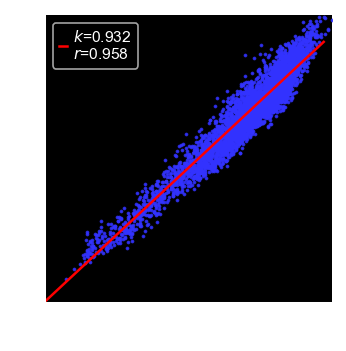

In [673]:
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=150)
ax.scatter(X[:,0], y, s=1, color=[0.2,0.2,1],#color=[0,0,0.5], 
           alpha=0.8)
line_x = np.arange(0, np.max(X), 0.1)
ax.plot(line_x[:,np.newaxis], reg.predict(line_x[:,np.newaxis]), 
        color='r', label=f'$k$={reg.coef_[0]:.3f}\n$r$={np.sqrt(reg.score(X, y)):.3f}')
ax.legend(fontsize=_font_size)

vmax = max(np.max(X), np.max(y))
ax.set_xlim([0, vmax])
ax.set_ylim([0, vmax])
ax.grid(False)

ax.set_xticks(np.arange(0, vmax, 1))
ax.set_yticks(np.arange(0, vmax, 1))

ax.set_xlabel(f"{sel_cls_1}, Chr{sel_chr} Median Dist."+' (\u03BCm)', fontsize=_font_size, labelpad=1)
ax.set_ylabel(f"{sel_cls_2}, Chr{sel_chr} Median Dist."+' (\u03BCm)', fontsize=_font_size, labelpad=1)

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
ax.spines["top"].set_visible(False) # remove top frame
ax.spines["right"].set_visible(False) #remove right frame

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.12, right=0.97, top=0.97, bottom=0.12)
plt.savefig(os.path.join(variation_figure_folder, 
                         f"scatter_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(variation_figure_folder, 
                         f"scatter_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [16]:
y_pred = reg.predict(X)
residual_mat = reg.predict(np.reshape(mat_1, -1)[:,np.newaxis]).reshape(mat_1.shape) - mat_2

<IPython.core.display.Javascript object>


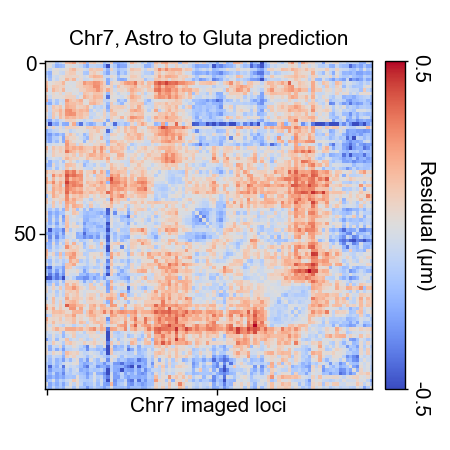

In [23]:
fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

# create a color map
#residual_cmap = cm.get_cmap('RdYlBu').copy()
residual_cmap = cm.get_cmap('coolwarm').copy()
residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = -0.5, 0.5

_pf = ax1.imshow(residual_mat, 
                 cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

ax1.set_title(f"Chr{sel_chr}, {sel_cls_2} to {sel_cls_1} prediction", fontsize=_font_size)
ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_yticklabels(_chr_names[:-1],)
ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_xticklabels(_chr_names[:-1], rotation=45)

ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Residual (\u03BCm)', 
               fontsize=_font_size, labelpad=2, rotation=270)
cbar.ax.minorticks_off()
fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)
             
plt.savefig(os.path.join(variation_figure_folder, 
                         f"residual_heatmap_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

## given chromosome, calculate pairwise correlation between subclasses

In [27]:
_celltype_order = ['Gluta', 'GABA', 'Astro', 'Oligo', 'Endo', 'Micro', ]

num_th = 500

sel_celltypes = [_c for _c in _celltype_order if len(class_2_chr2ZxysList[_c]) > num_th]


In [29]:
chr_2_correlationDf = {}
chr_2_slopeDf = {}
for sel_chr in chr_2_indices:
    if sel_chr in ['Y']:
        continue
    correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
    slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
    for _cls_1 in _celltype_order:
        if len(class_2_chr2ZxysList[_cls_1]) < num_th:
            continue
        _mat_1 = class_2_medianDict[_cls_1][f'cis_{sel_chr}']
        _reg_rs = []
        _reg_ks = []
        for _cls_2 in _celltype_order:
            _mat_2 = class_2_medianDict[_cls_2][f'cis_{sel_chr}']
            if len(class_2_chr2ZxysList[_cls_2]) < num_th:
                continue
            #run regression
            X = _mat_1[np.triu_indices_from(_mat_1,1)]
            y = _mat_2[np.triu_indices_from(_mat_2,1)]
            valid_inds = (np.isfinite(X) & np.isfinite(y))
            #print(np.sum(valid_inds), _cls_1)
            X = X[valid_inds,np.newaxis]
            y = y[valid_inds]
            #sel_inds = np.where()
            reg = LinearRegression(fit_intercept=False).fit(X, y)
            #Returns the coefficient of determination R^2 of the prediction.
            _r = np.sqrt(reg.score(X, y))
            _reg_rs.append(_r)
            _reg_ks.append(reg.coef_[0])
            
        correlation_dicts[_cls_1] = _reg_rs
        slope_dicts[_cls_1] = _reg_ks
    # append as DF
    correlation_df = pd.DataFrame(correlation_dicts).set_index('cell type')  
    chr_2_correlationDf[sel_chr] = correlation_df
    slope_df = pd.DataFrame(slope_dicts).set_index('cell type')  
    chr_2_slopeDf[sel_chr] = slope_df

<IPython.core.display.Javascript object>


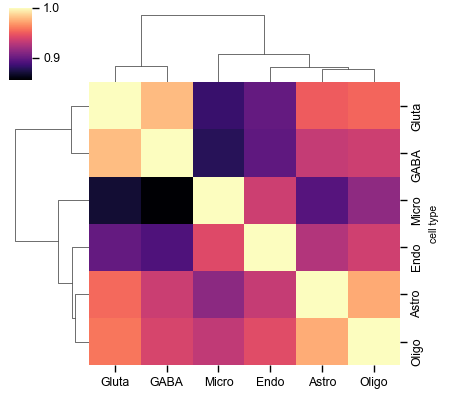

In [31]:
from scipy.cluster.hierarchy import linkage,dendrogram
_corr_lkg = linkage(correlation_df.values, method='median')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
sns.clustermap(chr_2_correlationDf['7'], col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='magma')

<IPython.core.display.Javascript object>


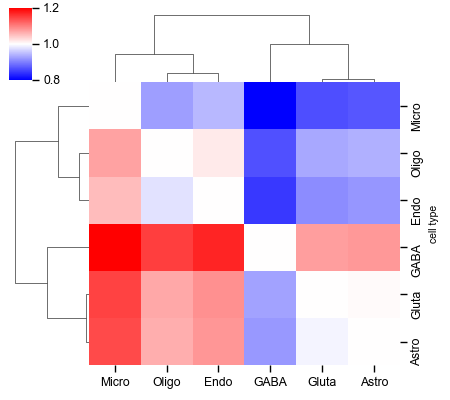

In [32]:
from scipy.cluster.hierarchy import linkage,dendrogram
_corr_lkg = linkage(chr_2_slopeDf['7'].values, method='median')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
cluster_fig = sns.clustermap(chr_2_slopeDf['7'], col_linkage=_corr_lkg, row_linkage=_corr_lkg, figsize=(4.5,4),
               cmap='bwr', vmin=0.8, vmax=1.2)

In [33]:
average_correlation_df = pd.DataFrame(np.nanmean([_v for _v in chr_2_correlationDf.values()], axis=0),
                                      columns=correlation_df.columns)

average_correlation_df.index = correlation_df.index

<IPython.core.display.Javascript object>


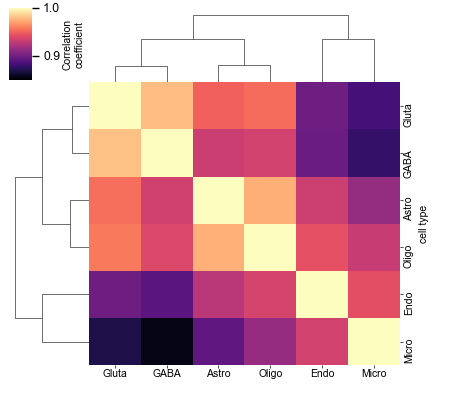

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/1509103985.py:17: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax])


In [36]:
from scipy.cluster.hierarchy import linkage,dendrogram
plot_chr = '7'
_corr_lkg = linkage(chr_2_correlationDf[plot_chr].values, method='median')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.85,1
ax = sns.clustermap(chr_2_correlationDf[plot_chr], 
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='magma', vmin=vmin, vmax=vmax)
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('Correlation\ncoefficient', labelpad=2, fontsize=_font_size)
plt.savefig(os.path.join(variation_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(variation_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [37]:
average_slope_df = pd.DataFrame(np.nanmean([_v for _v in chr_2_slopeDf.values()], axis=0),
                                      columns=slope_df.columns)

average_slope_df.index = slope_df.index

<IPython.core.display.Javascript object>


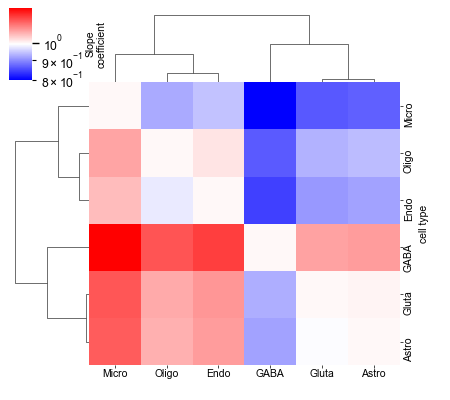

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/412444944.py:19: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)


In [46]:
from scipy.cluster.hierarchy import linkage,dendrogram
from matplotlib.colors import LogNorm

plot_chr = '7'
_corr_lkg = linkage(chr_2_slopeDf[plot_chr].values, method='weighted')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.8, 1.25
ax = sns.clustermap(chr_2_slopeDf[plot_chr], 
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='bwr', vmin=vmin, vmax=vmax, norm=LogNorm())
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('Slope\ncoefficient', labelpad=2, fontsize=_font_size)
plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [78]:
#sel_chr = '5'#'7'
num_th = 500

chr_2_class_variation_mat = {}
chr_2_residual_mats = {}
for sel_chr in chr_2_indices:
    if sel_chr in ['Y']:
        continue
        
    residual_mats = []
    correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
    for _cls_1 in _celltype_order:
        if len(class_2_chr2ZxysList[_cls_1]) < num_th:
            continue
        _mat_1 = class_2_medianDict[_cls_1][f'cis_{sel_chr}']
        _reg_rs = []
        for _cls_2 in _celltype_order:
            _mat_2 = class_2_medianDict[_cls_2][f'cis_{sel_chr}']
            if len(class_2_chr2ZxysList[_cls_2]) < num_th:
                continue
            #run regression
            X = _mat_1[np.triu_indices_from(_mat_1,1)]
            y = _mat_2[np.triu_indices_from(_mat_2,1)]
            valid_inds = (np.isfinite(X) & np.isfinite(y))
            #print(np.sum(valid_inds), _cls_1)
            X = X[valid_inds,np.newaxis]
            y = y[valid_inds]
            #sel_inds = np.where()
            reg = LinearRegression(fit_intercept=False).fit(X, y)
            #Returns the coefficient of determination R^2 of the prediction.
            _r = np.sqrt(reg.score(X, y))
            _reg_rs.append(_r)
            # residual
            #y_pred = reg.predict(X)
            _valid_mat1 = _mat_1[np.isfinite(_mat_1)]
            _pred_valid_mat1 = reg.predict(_valid_mat1[:,np.newaxis])
            _pred_mat1 = np.ones_like(_mat_1) * np.nan
            _pred_mat1[np.isfinite(_mat_1)] = _pred_valid_mat1
            # residual
            _rmat = _pred_mat1 - _mat_2
            # append
            residual_mats.append(_rmat)
        correlation_dicts[_cls_1] = _reg_rs
    correlation_df = pd.DataFrame(correlation_dicts).set_index('cell type')    

    residual_mats = np.array(residual_mats)
    residual_mats = residual_mats.reshape(len(sel_celltypes),len(sel_celltypes), 
                                          residual_mats.shape[-2],residual_mats.shape[-1],  )

    # calculate variational mat
    class_variation_mat = np.nanstd(residual_mats[np.triu_indices(len(sel_celltypes),1)], axis=0)
    chr_2_class_variation_mat[sel_chr] = class_variation_mat
    chr_2_residual_mats[sel_chr] = residual_mats

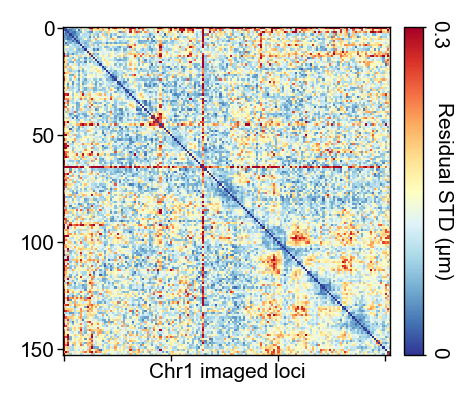

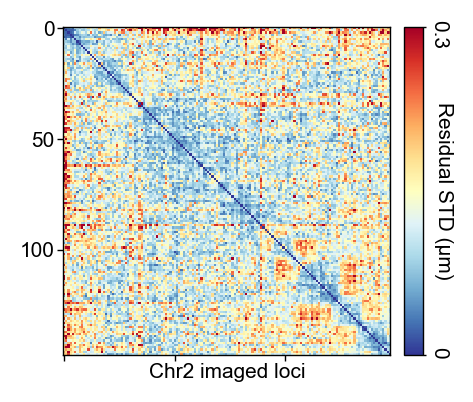

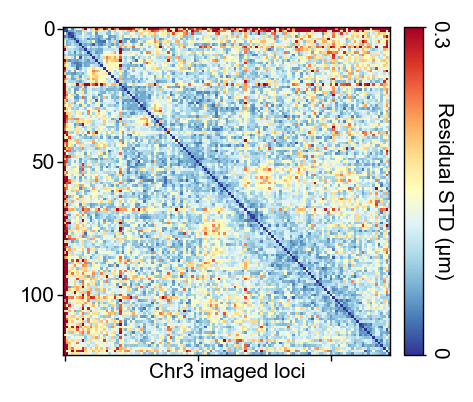

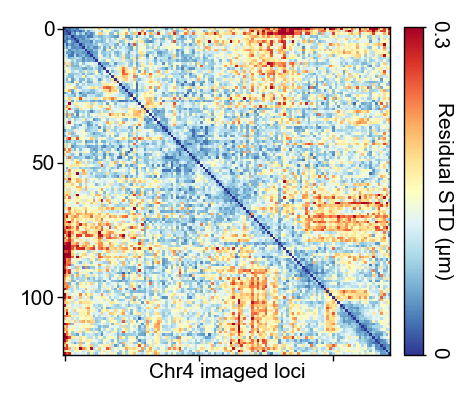

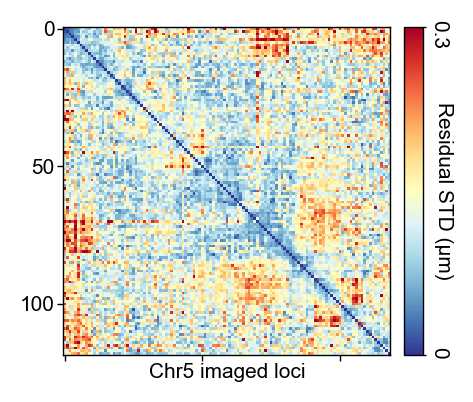

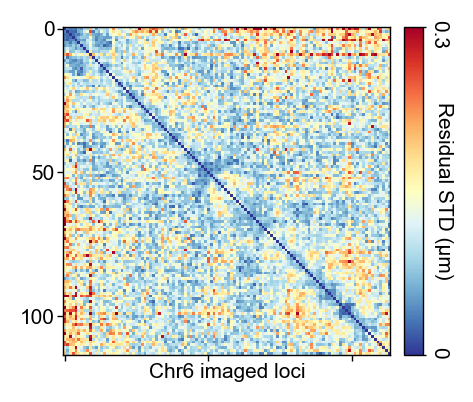

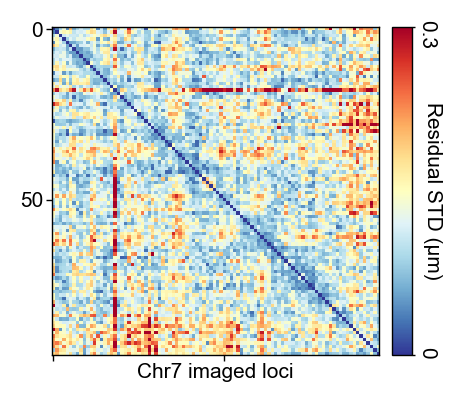

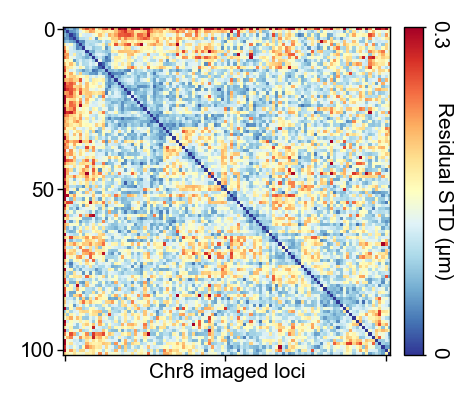

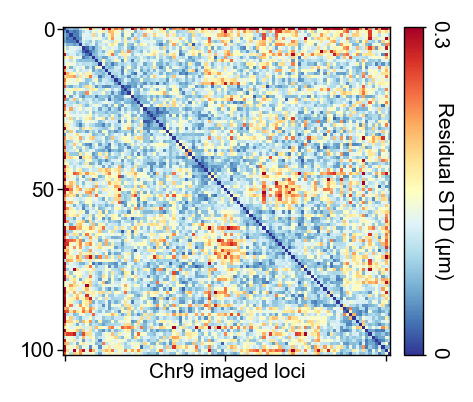

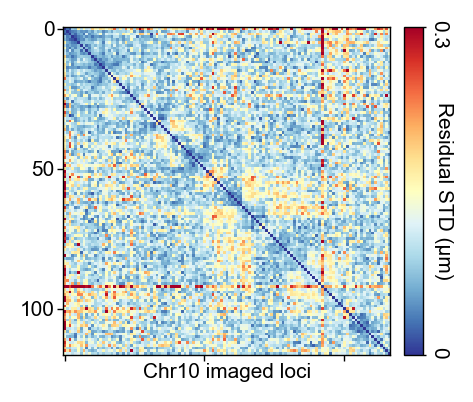

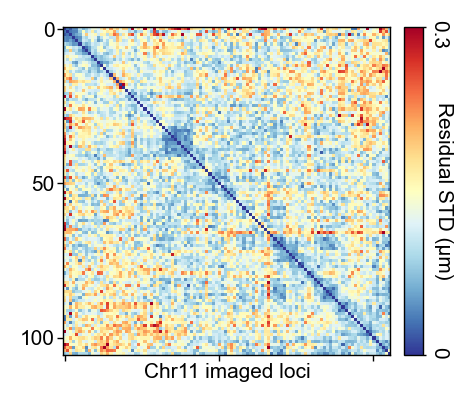

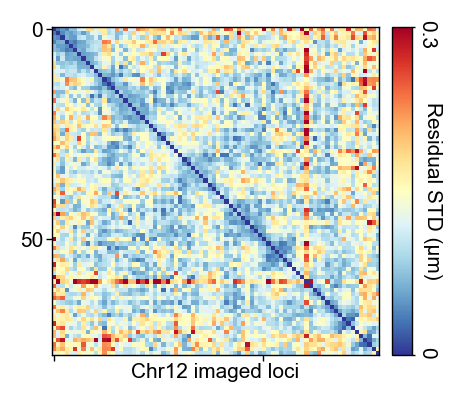

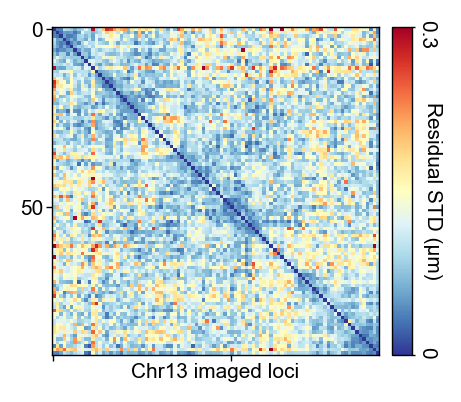

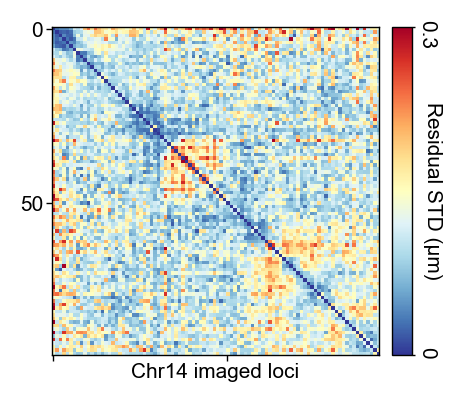

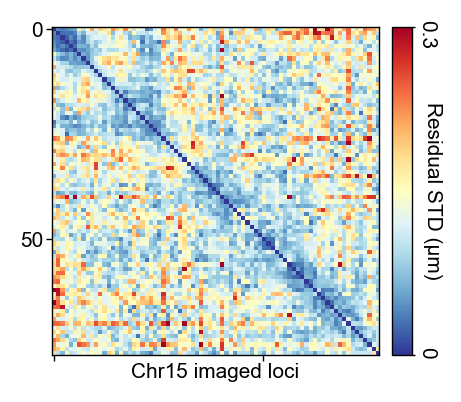

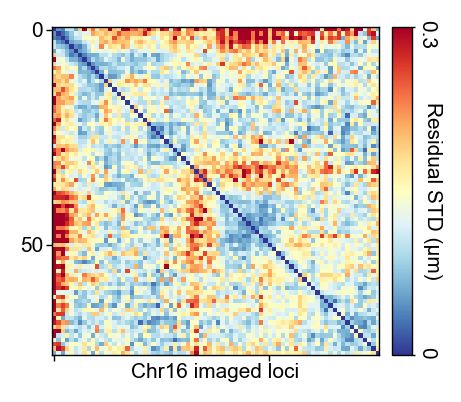

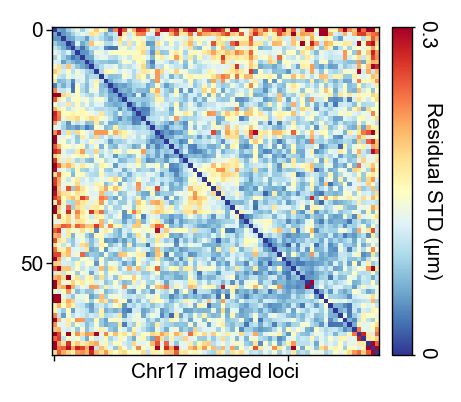

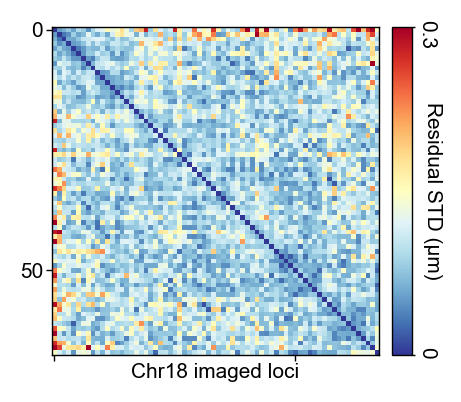

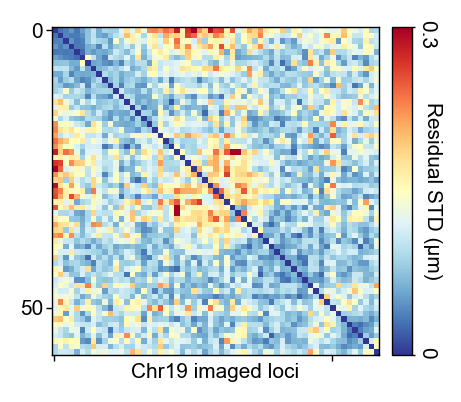

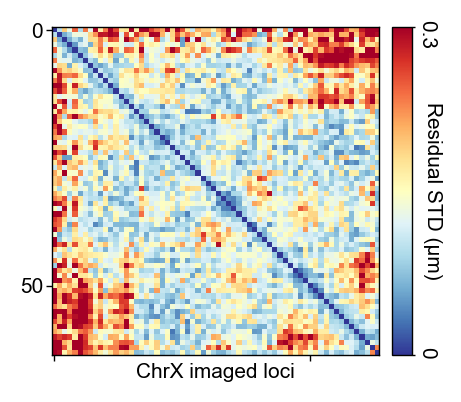

In [58]:

for sel_chr, class_variation_mat in chr_2_class_variation_mat.items():
    # plot
    fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

    # create a color map
    residual_cmap = cm.get_cmap('RdYlBu_r').copy()
    residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 0, 0.3

    _pf = ax1.imshow(class_variation_mat, 
                     cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

    #ax1.set_title(f"Chr{sel_chr}, standard deviation of residuals", fontsize=_font_size)
    ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
    ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
    #ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
    #ax1.set_xticklabels(_chr_names[:-1], rotation=45)

    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
    ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

    ax1.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Residual STD (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()
    fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(os.path.join(variation_figure_folder, f"variation_residual_heatmap_chr{sel_chr}.pdf"),
                transparent=True, bbox_inches='tight', dpi=300)
    plt.savefig(os.path.join(variation_figure_folder, f"variation_residual_heatmap_chr{sel_chr}.png"),
                transparent=True, bbox_inches='tight', dpi=300)
    plt.show()

In [150]:
_celltype_order

['Gluta', 'GABA', 'Astro', 'Oligo', 'Endo', 'Micro']

In [192]:
import scanpy as sc
import anndata

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

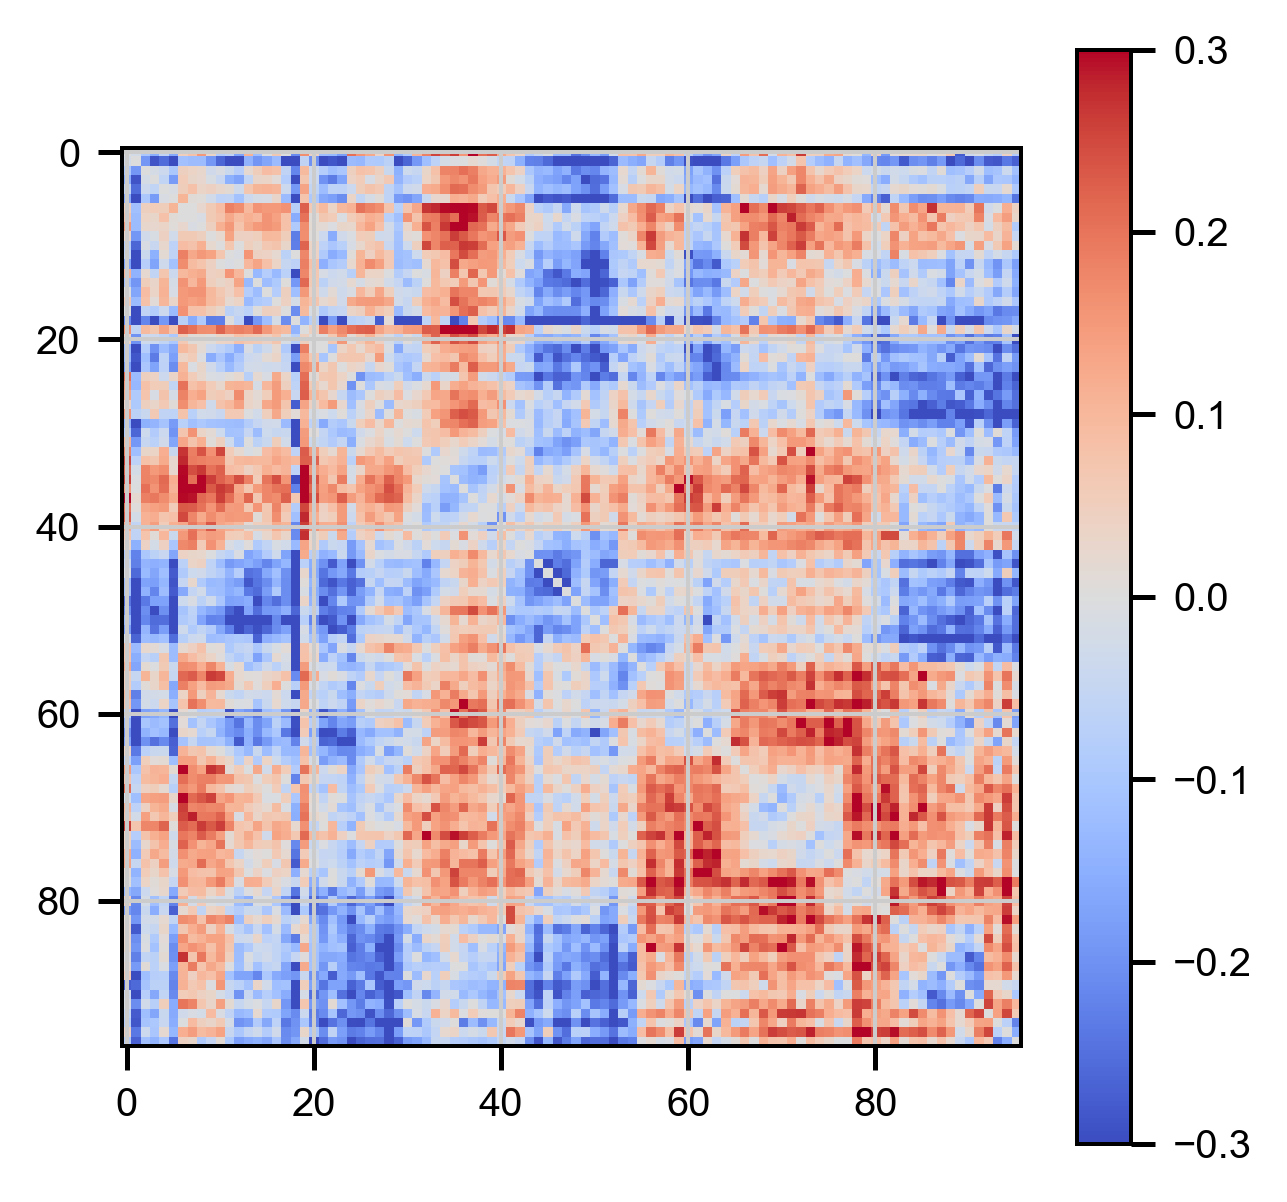

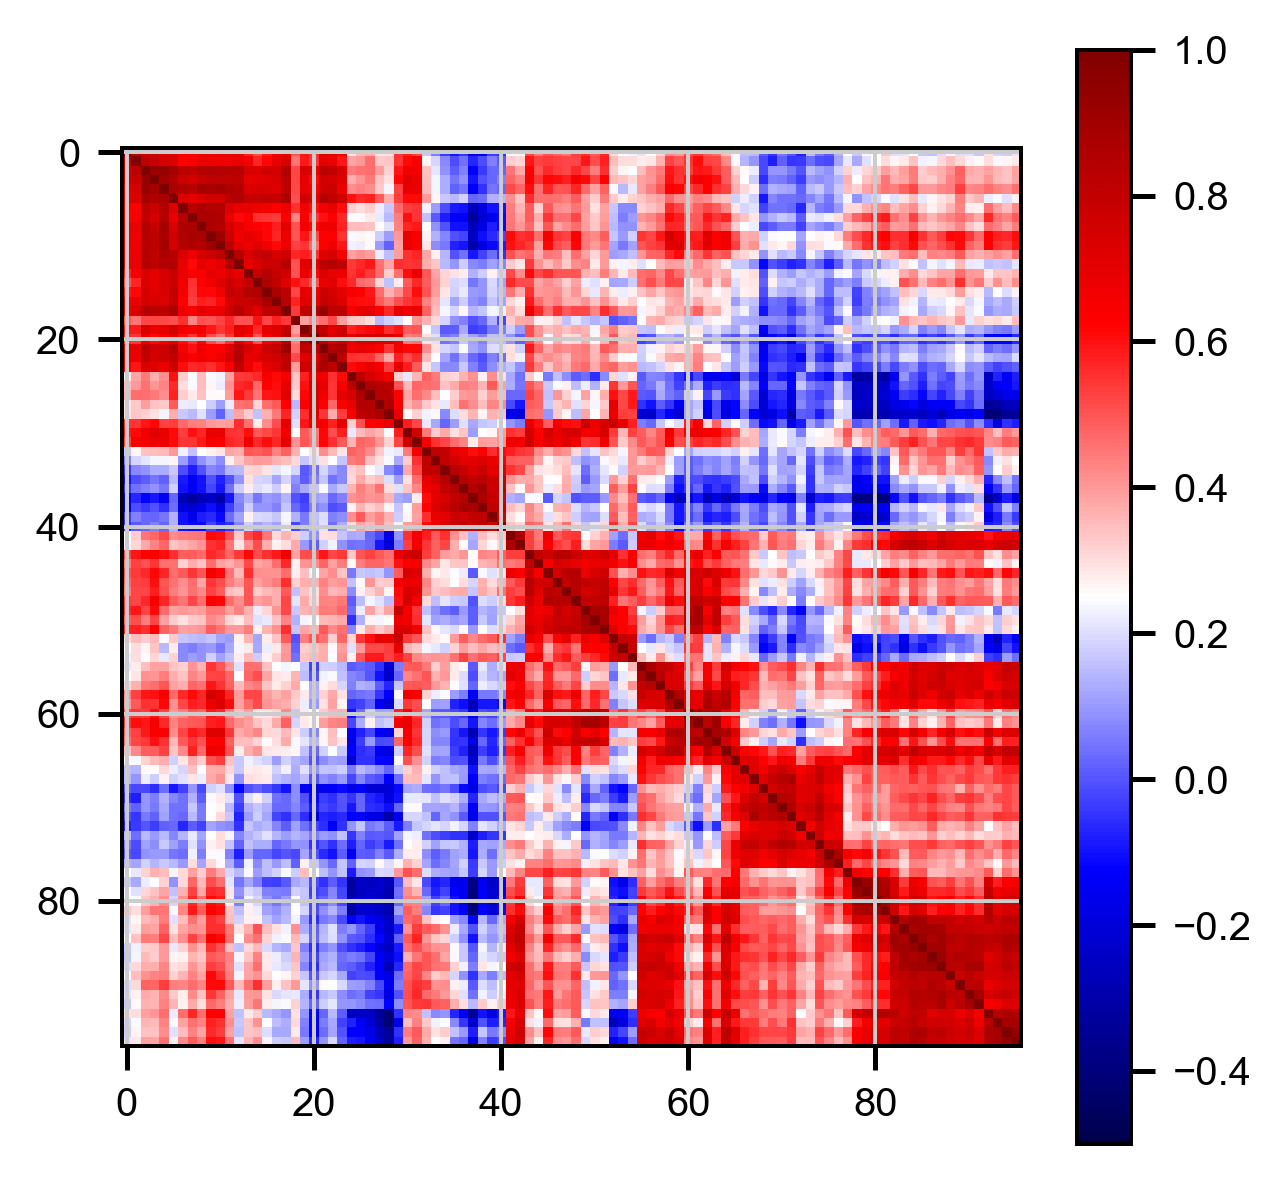

In [370]:
import matplotlib.pyplot as plt
test_mat = chr_2_residual_mats['7'][0,3]
plt.figure()
plt.imshow(test_mat, vmin=-0.3, vmax=0.3, cmap='coolwarm')
plt.colorbar()
plt.figure()
plt.imshow(np.corrcoef(test_mat), vmin=-0.5, vmax=1, cmap='seismic')
plt.colorbar()

In [356]:

adata = anndata.AnnData(test_mat)
adata.obs['reg_id'] = np.arange(0, len(test_mat))

# Principal component analysis
sc.tl.pca(adata)
# Plot the PCA results
#sc.pl.pca(adata, color='reg_id', s=40)

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/1300790256.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(test_mat)


In [357]:
%%time
# Computing the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=8, n_pcs=30)
# Clustering
sc.tl.leiden(adata, resolution=0.5)
# Embed with UMAP
sc.tl.umap(adata)

Wall time: 859 ms


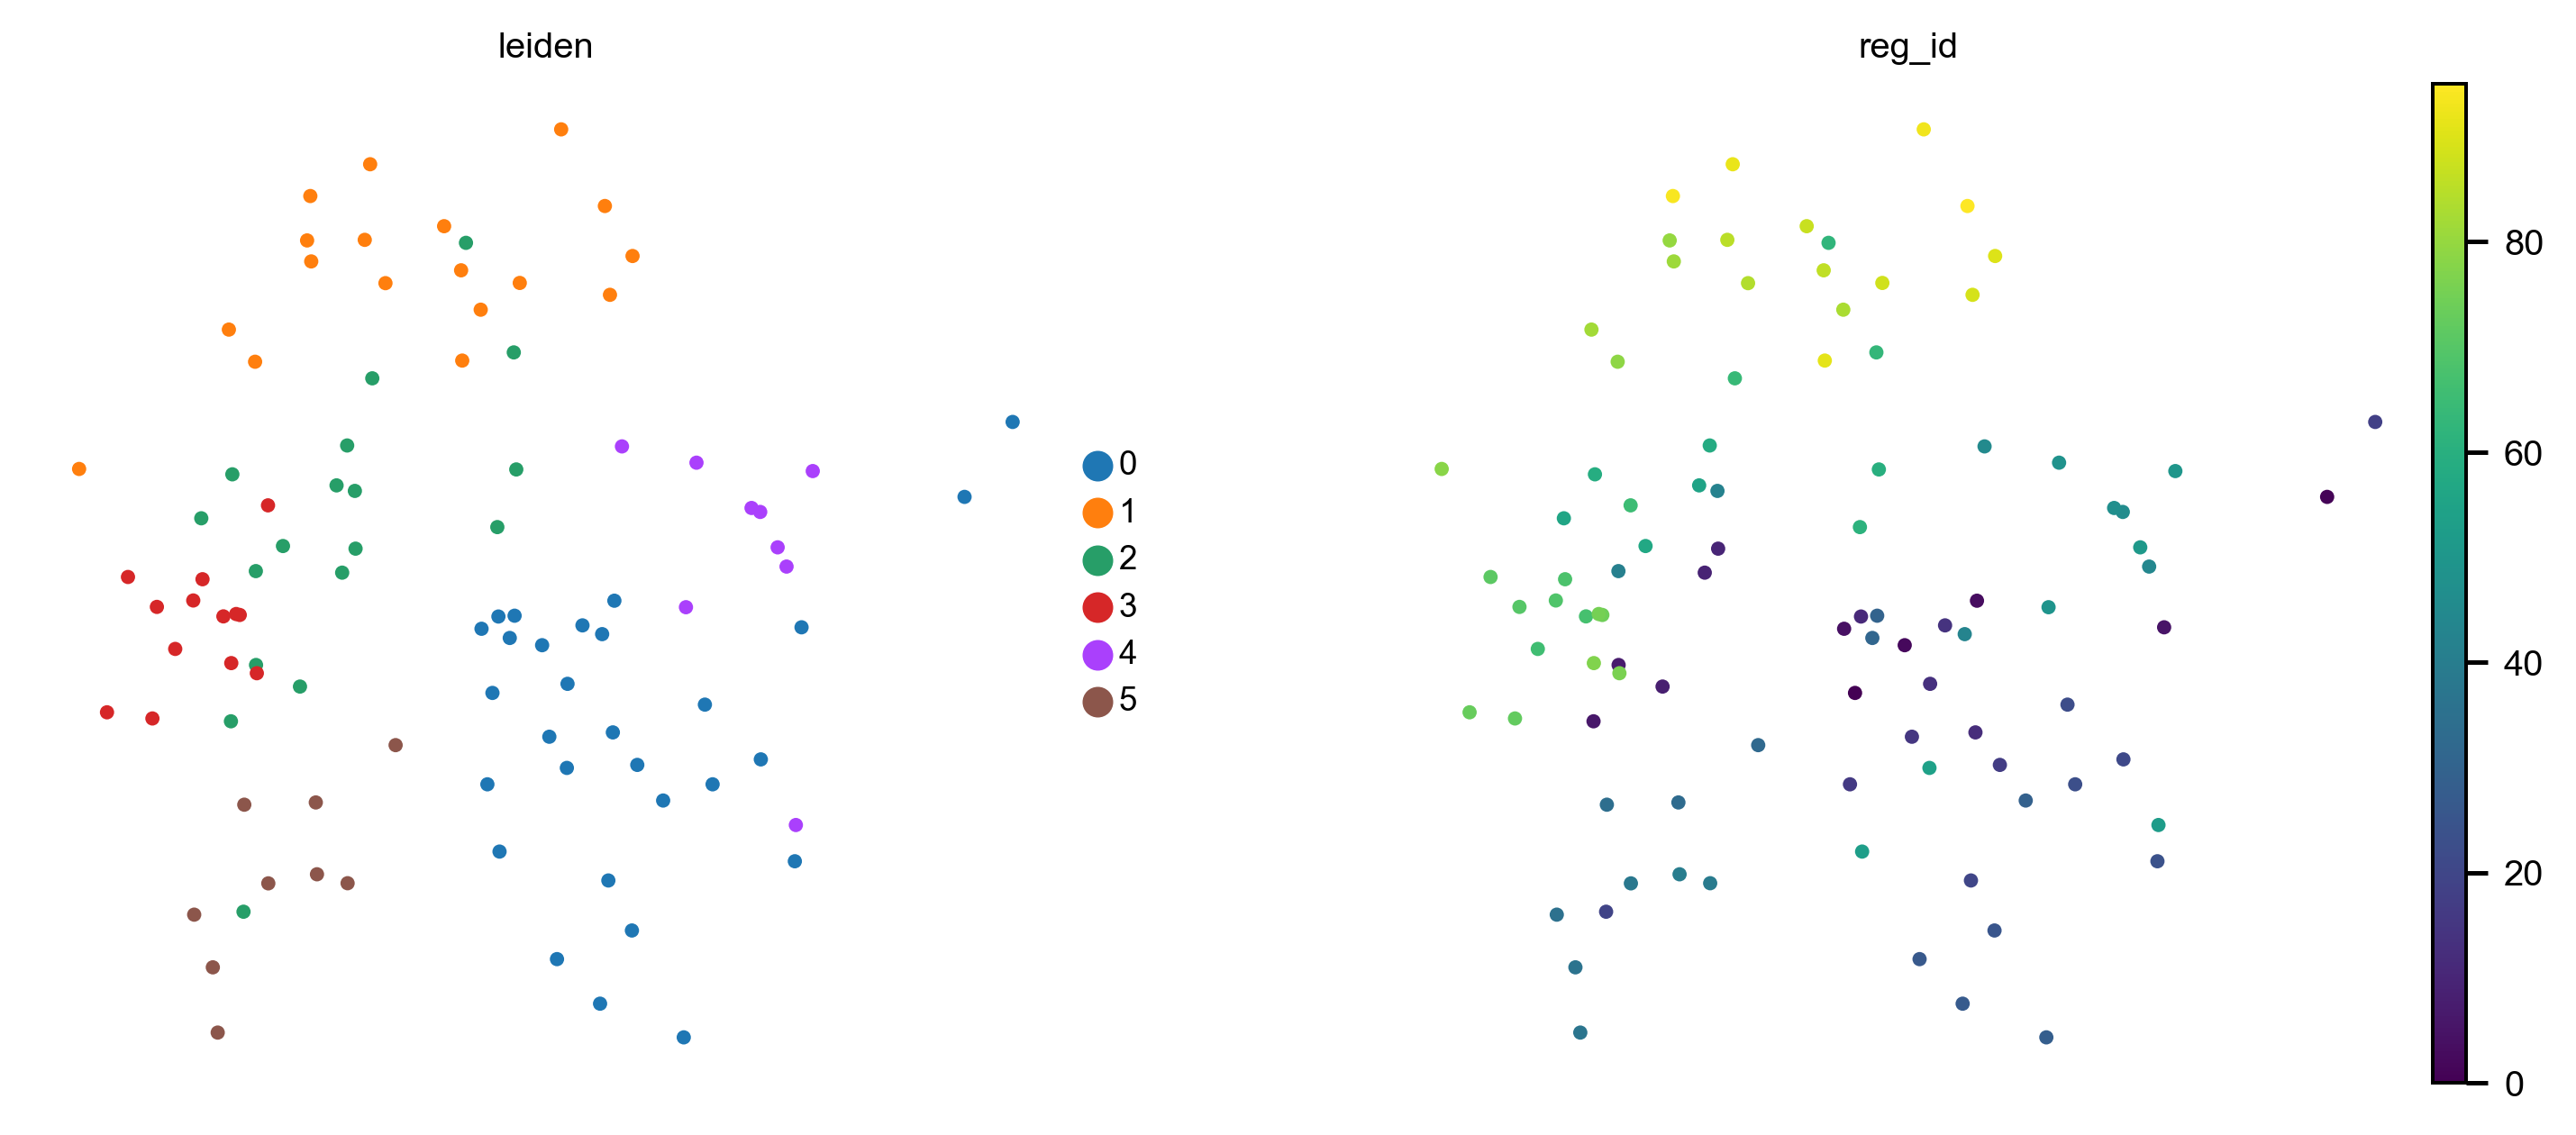

In [358]:
sc.pl.pca(adata, color=['leiden', 'reg_id'], s=40)

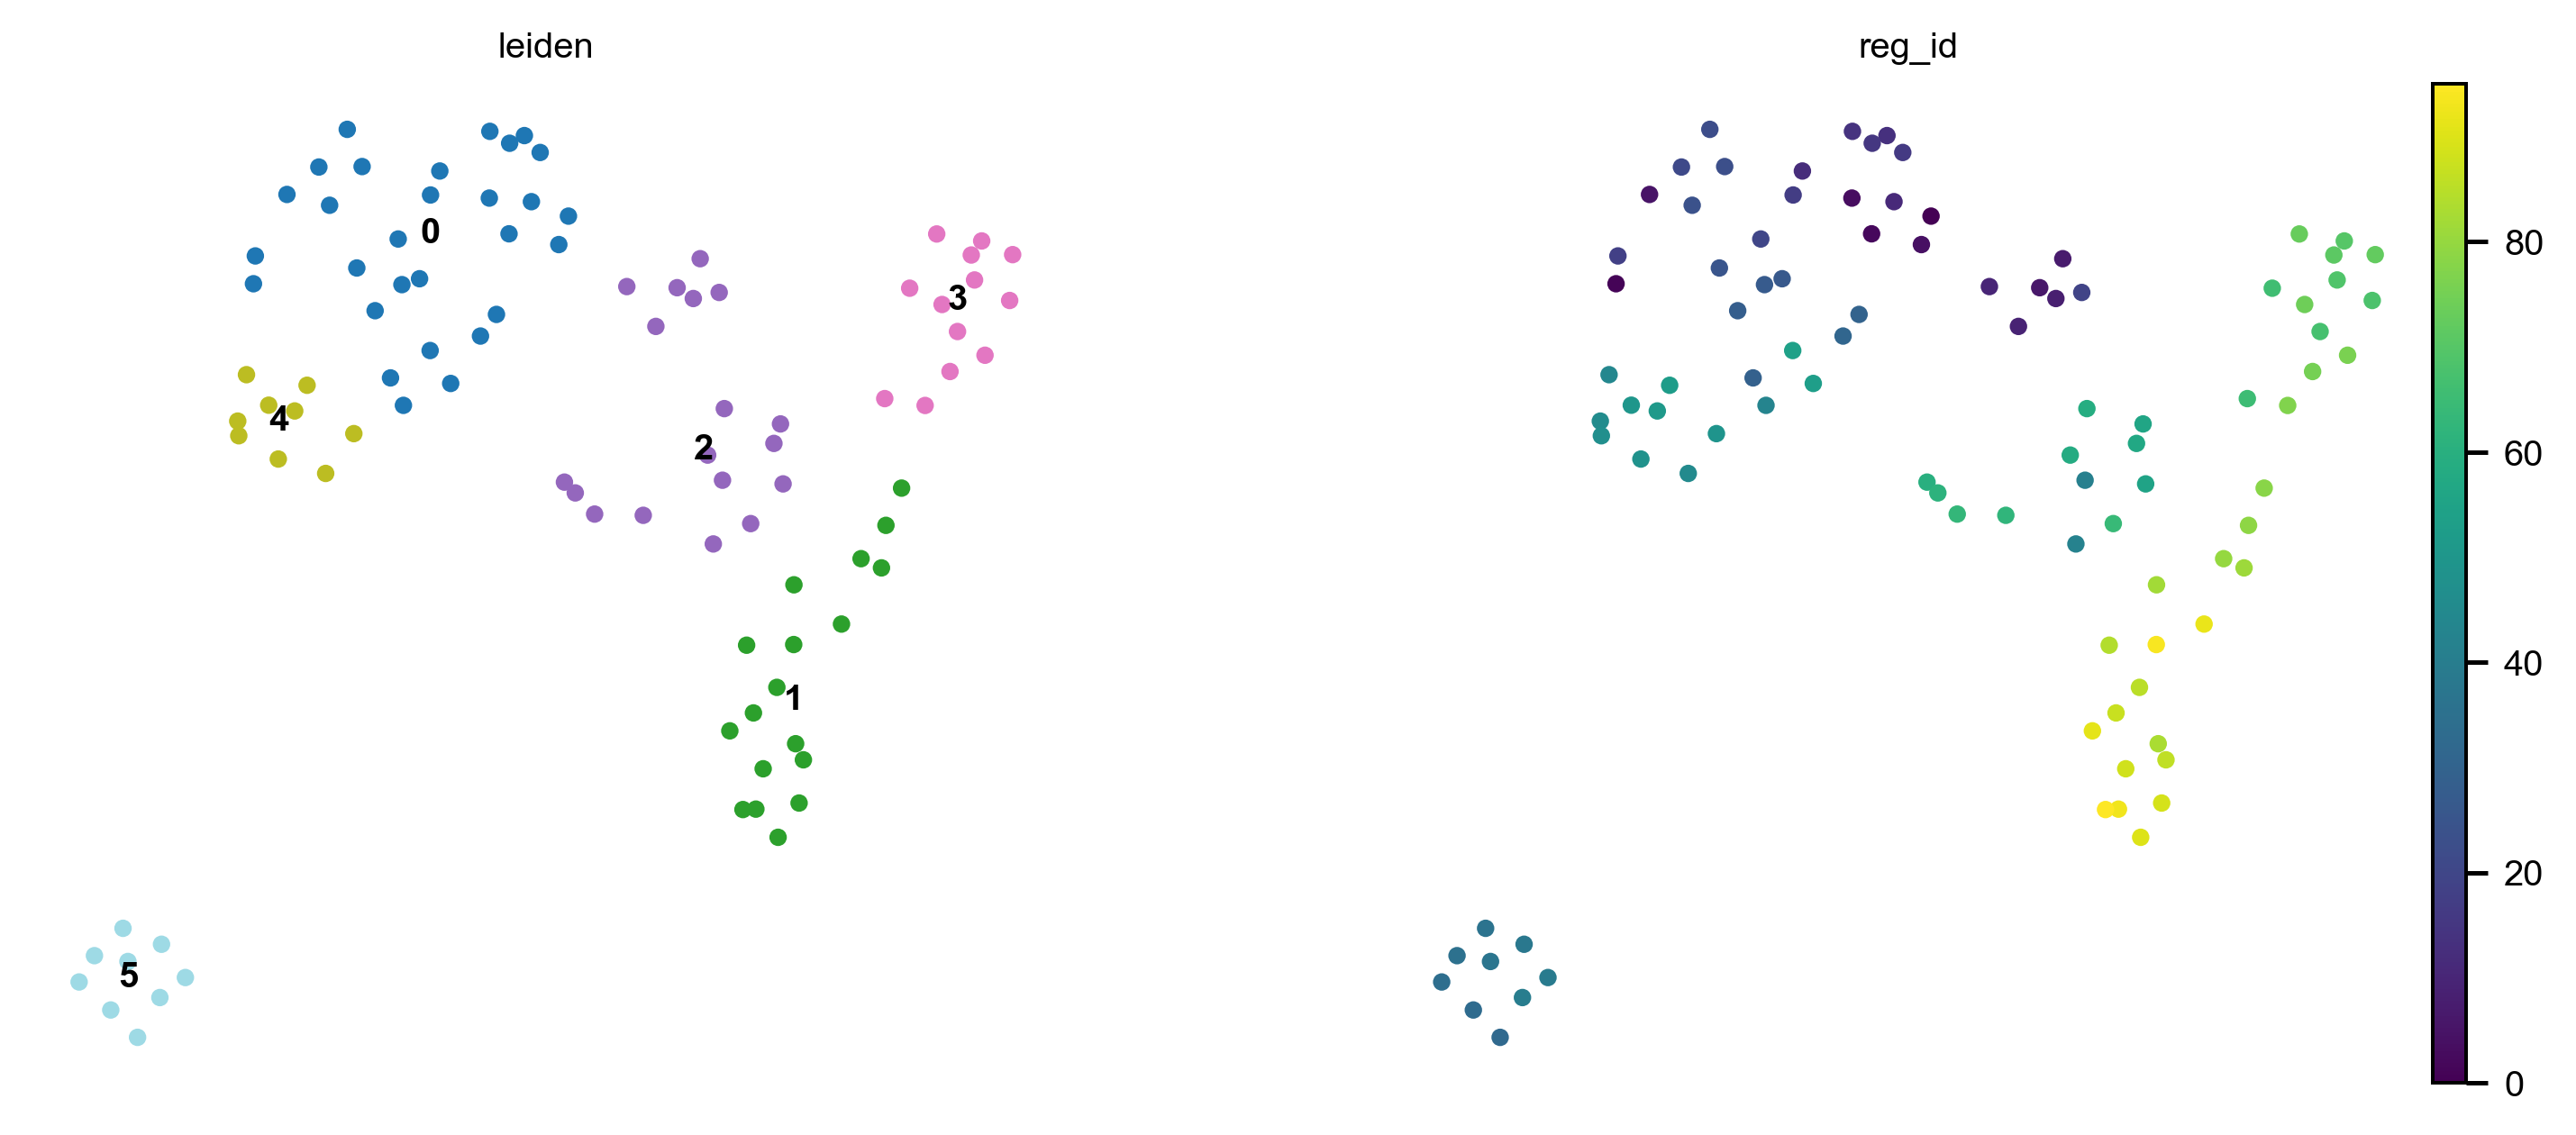

Wall time: 314 ms


In [359]:
%%time
# Plot the UMAP
sc.pl.umap(adata, color=['leiden', 'reg_id'], 
           legend_loc='on data',
           palette='tab20',
           #save='_cluster.png',
           s=60,
           )

In [360]:
pc_coords = (adata.X @ adata.varm['PCs'])
pc_2_center = {}
for _cluster in np.unique(adata.obs['leiden']):
    pc_2_center[_cluster] = pc_coords[(adata.obs['leiden']==_cluster).values].mean(0)
centers = np.array([_c for _c in pc_2_center.values()])

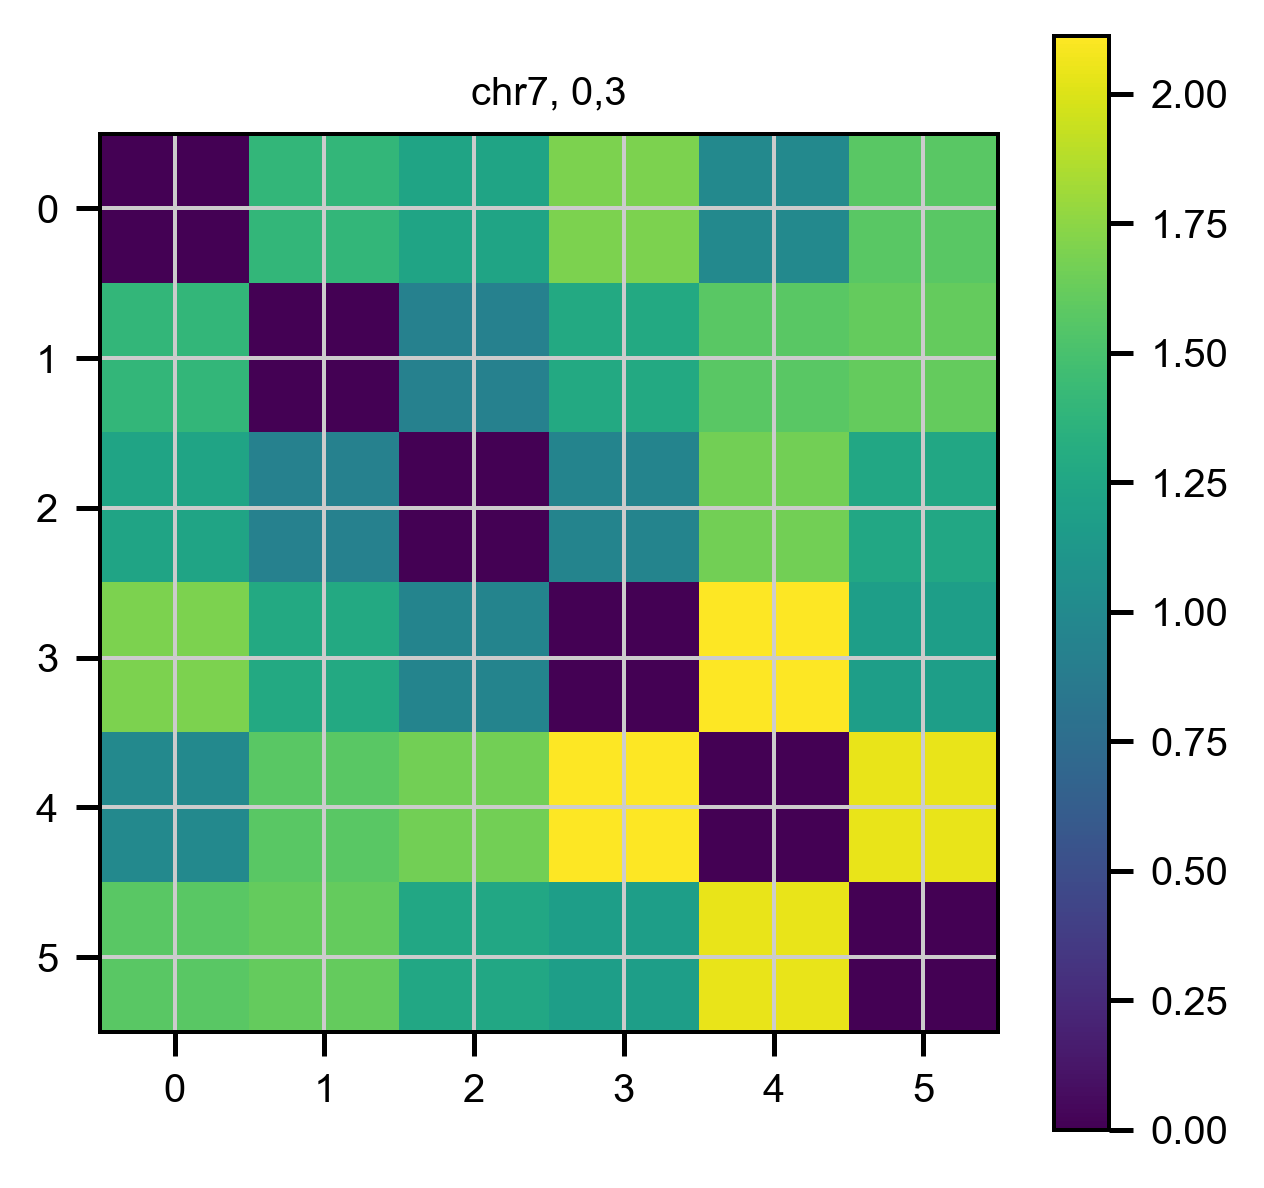

In [361]:
plt.figure()
plt.imshow(squareform(pdist(centers)))
plt.title('chr7, 0,3')
plt.colorbar()

In [286]:
from scipy.spatial.distance import pdist, squareform

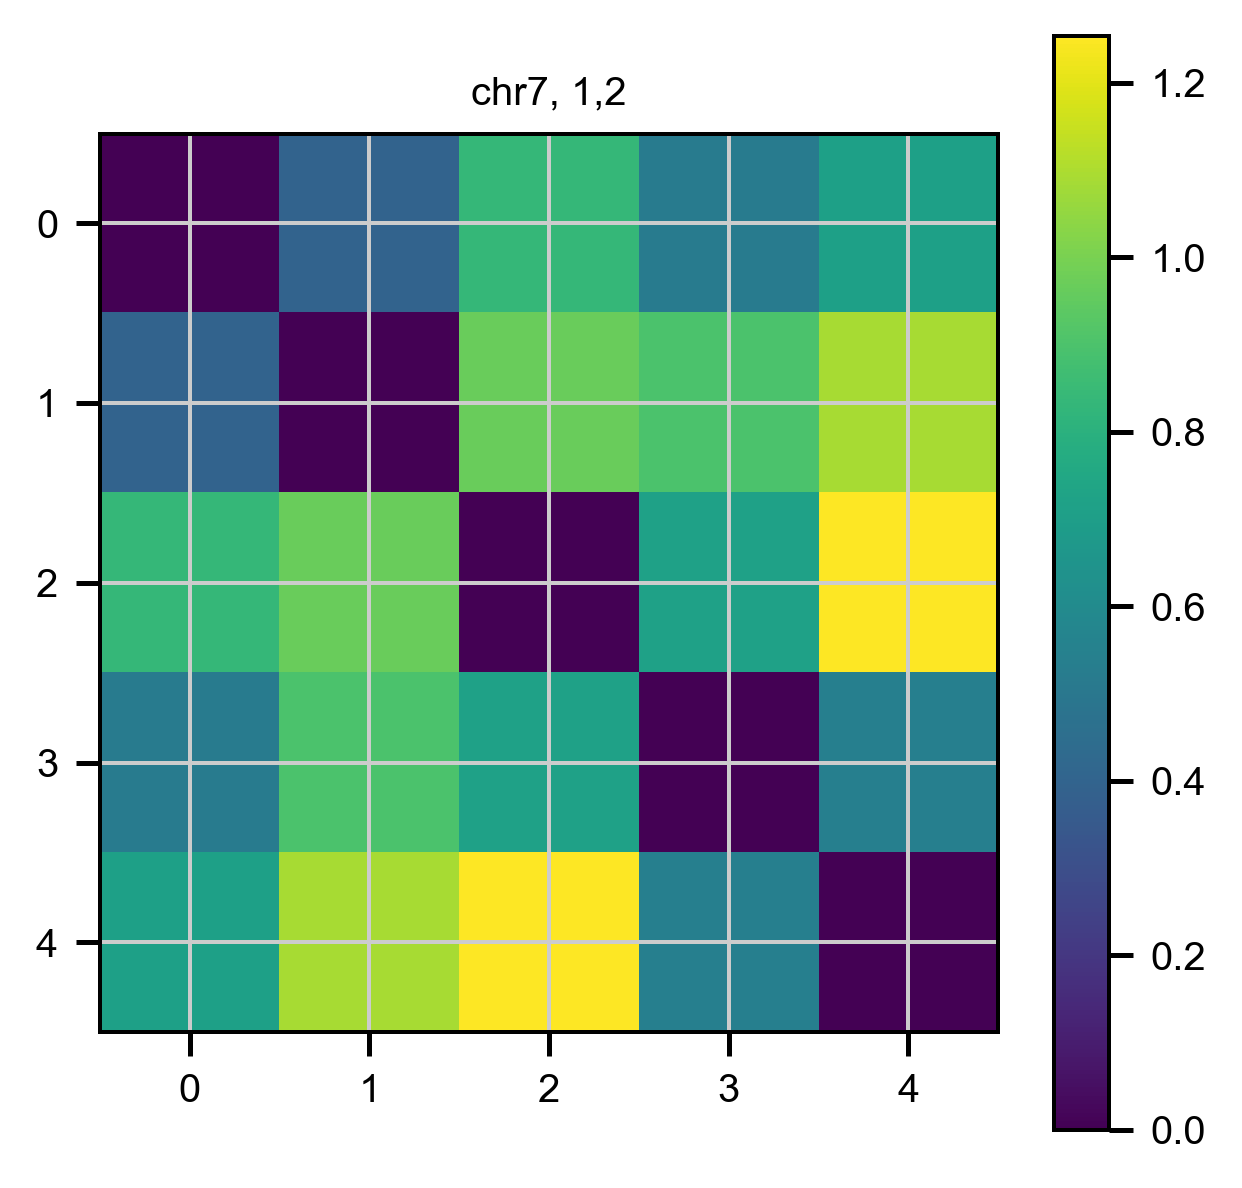

In [292]:
plt.figure()
plt.imshow(squareform(pdist(centers)))
plt.title('chr7, 1,2')
plt.colorbar()

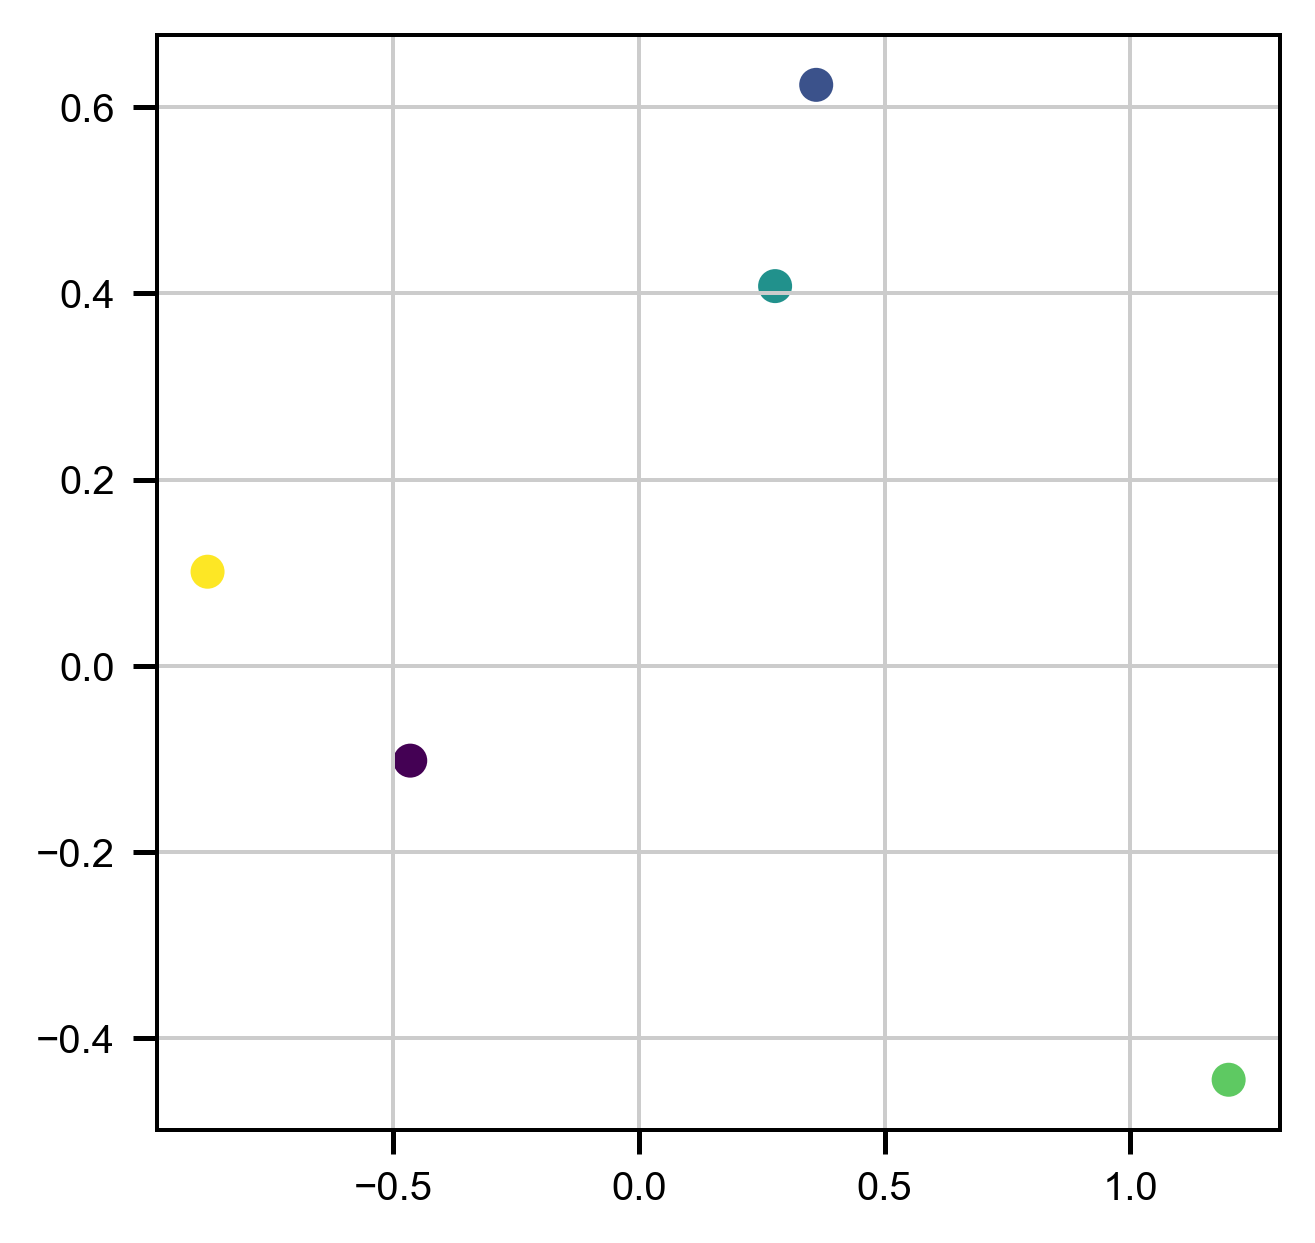

In [318]:
plt.figure()
_ax = plt.scatter(centers[:,0], centers[:,1], c=np.unique(adata.obs['leiden']).astype(np.int32))


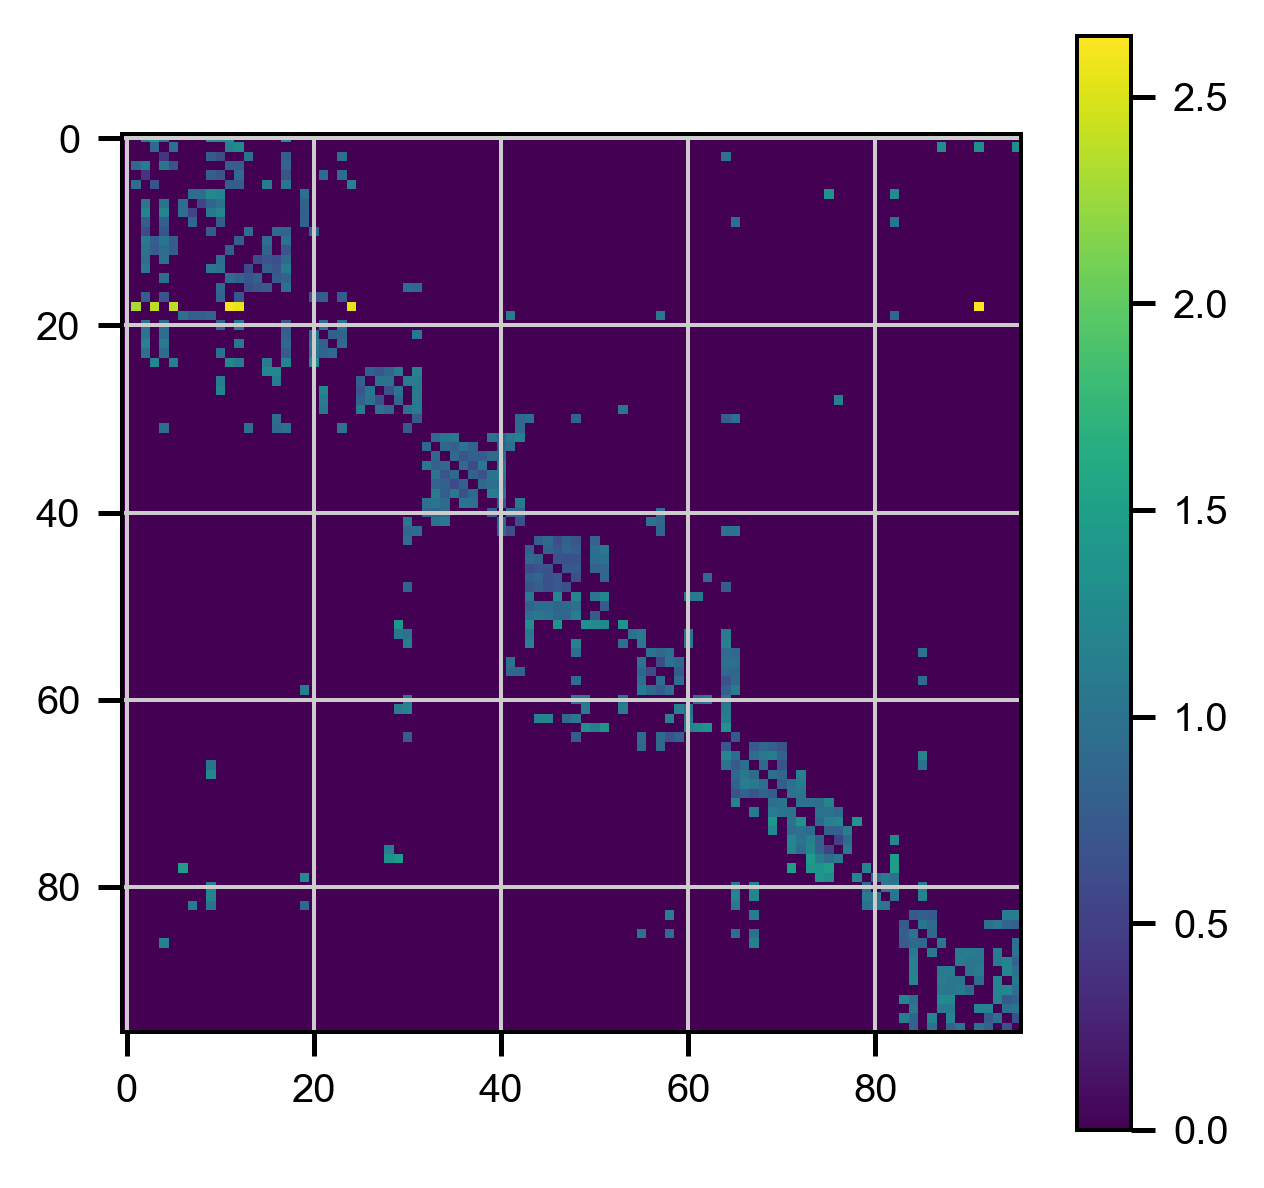

In [319]:
plt.figure()
plt.imshow(adata.obsp['distances'].todense())
plt.colorbar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24], dtype=int64),)

In [340]:
cmap = cm.Spectral.copy()


In [337]:
adata.obs.index.values.astype(np.int32).shape

(96,)

(0.0, 96.0)

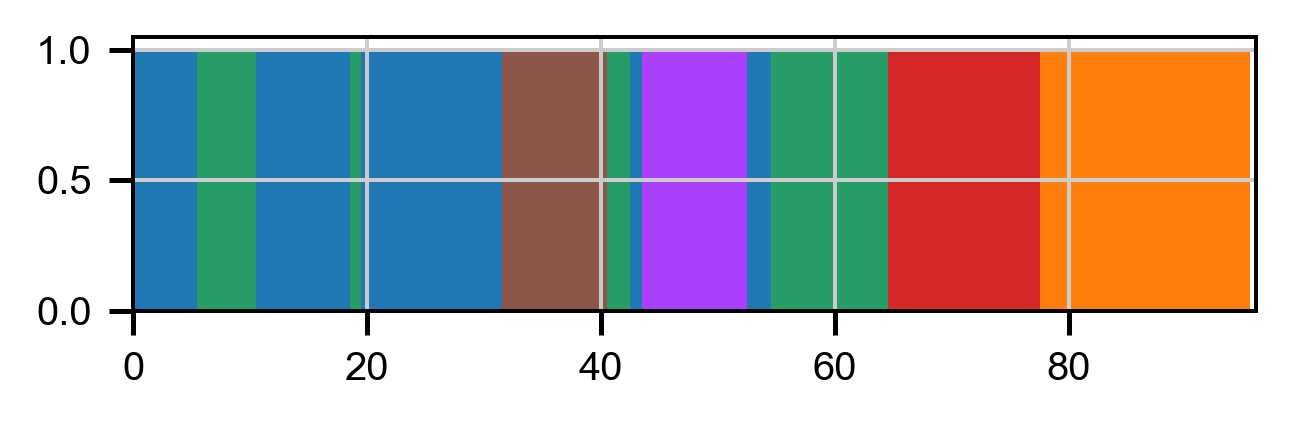

In [368]:
a

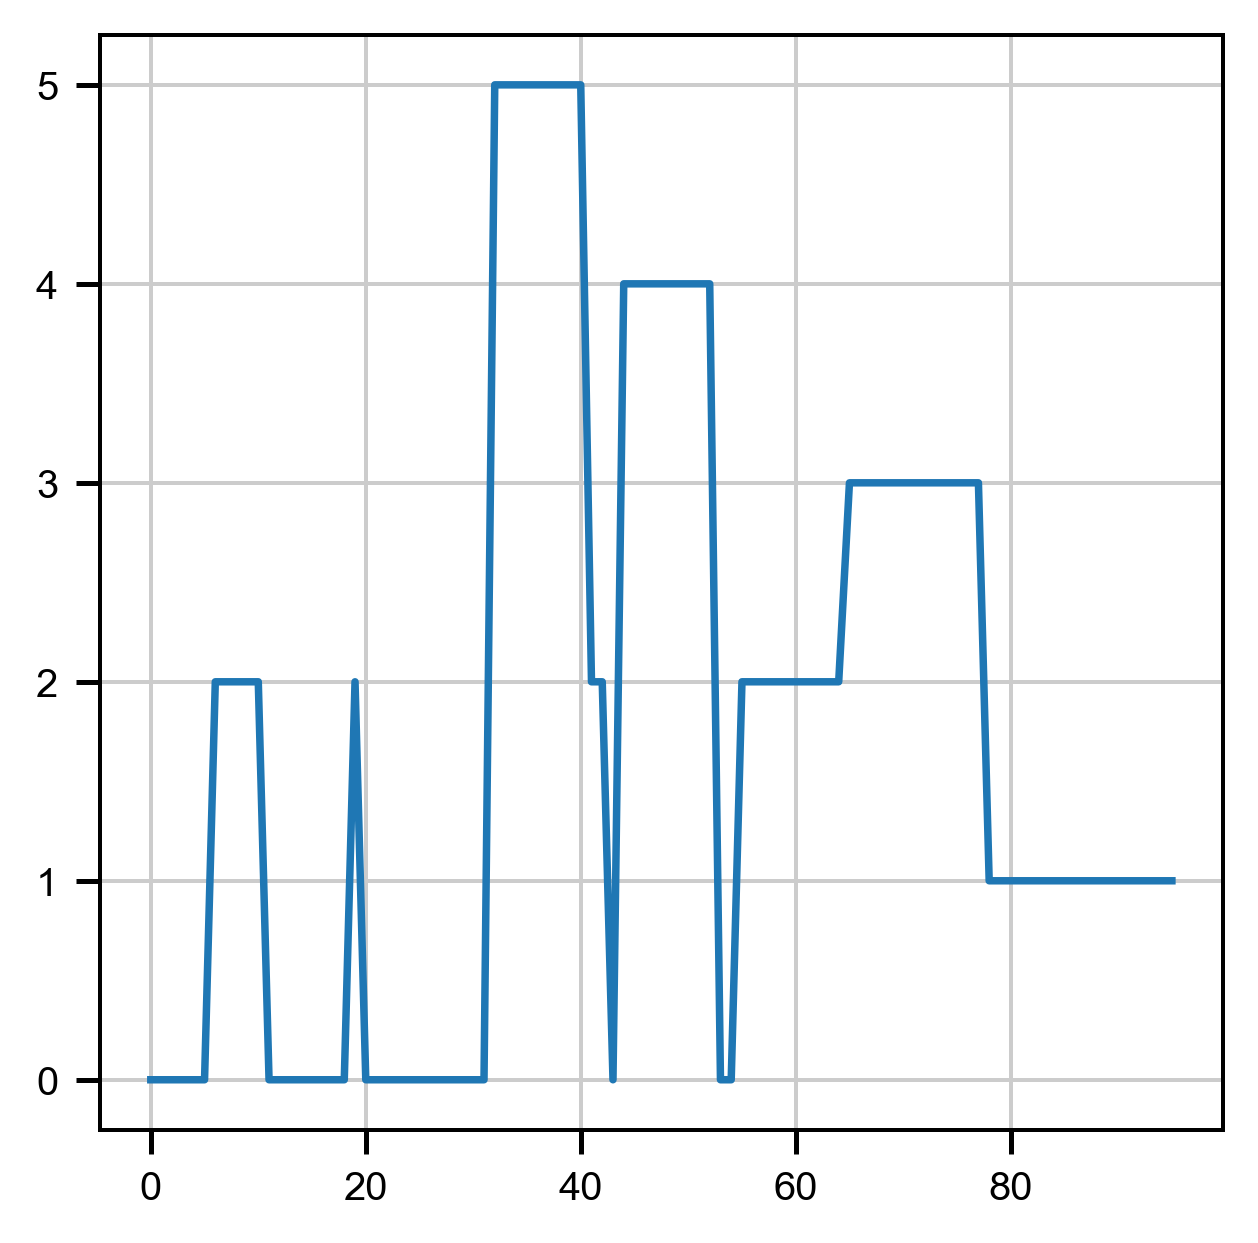

In [369]:
plt.figure()
plt.plot(adata.obs.index.values.astype(np.int32), adata.obs['leiden'].values.astype(np.int32))

In [ ]:
chr_2_residual_mats['11'][1,2]

In [136]:
chr_2_class_variation_mat['11'].shape

(106, 106)

In [126]:
test_mat = np.corrcoef(chr_2_class_variation_mat['11'])

In [128]:
test_mat = np.nanmean(chr_2_residual_mats['11'][np.triu_indices(len(sel_celltypes),1)], axis=0)

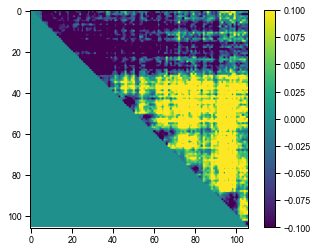

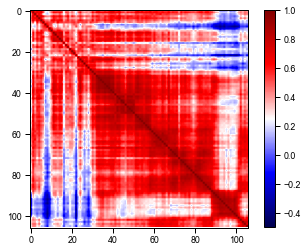

In [129]:
plt.figure()
plt.imshow(np.triu(test_mat,1), vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.figure()
plt.imshow(np.corrcoef(test_mat), vmin=-0.5, vmax=1, cmap='seismic')
plt.colorbar()

In [130]:
test_mat = np.nanmean(chr_2_residual_mats['11'][np.tril_indices(len(sel_celltypes),1)], axis=0)

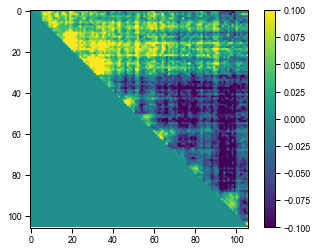

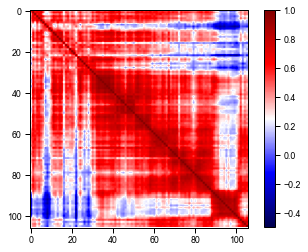

In [131]:
plt.figure()
plt.imshow(np.triu(test_mat,1), vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.figure()
plt.imshow(np.corrcoef(test_mat), vmin=-0.5, vmax=1, cmap='seismic')
plt.colorbar()

## moving average

In [324]:
def moving_cube_along_diagonal(_mat, cube_size=5):
    _chr_size = len(_mat)
    _moving_cubes = []
    for _i in range(_chr_size-cube_size):
        _cube = _mat[_i:_i+cube_size, _i:_i+cube_size]
        #_cube = np.triu(_cube,1)
        _moving_cubes.append(np.mean(_cube[np.tril_indices(cube_size, 1)]))
    
    return _moving_cubes

In [325]:
sel_chr = '7'

In [326]:
diagonal_variations = {}
for _window_size in [2,4,6]:
    diagonal_variations[_window_size] = moving_cube_along_diagonal(chr_2_class_variation_mat[sel_chr], _window_size)

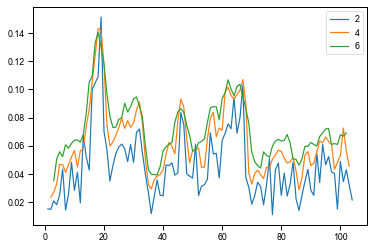

In [135]:
plt.figure()
for _window_size, _diagonal_vars in diagonal_variations.items():
    plt.plot(np.arange(_window_size/2, len(chr_2_class_variation_mat[sel_chr])-_window_size/2),
             _diagonal_vars,
             label=f"{_window_size}",
            )
plt.legend()
plt.show()

# AB scaling

In [377]:
ensemble_normedPC1_filename = os.path.join(postanalysis_folder, 'ensemble_pc1.npy')
ensemble_normedPC1 = np.load(ensemble_normedPC1_filename)

In [384]:
chr_2_indices, chr_2_order = ia.structure_tools.distance.Generate_PlotOrder(codebook, codebook, sort_by_region=False)

In [385]:
chr_2_indices[sel_chr]

array([779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791,
       792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804,
       805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817,
       818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830,
       831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843,
       844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856,
       857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869,
       870, 871, 872, 873, 874])

In [378]:
# define AB
ensemble_AB_dict = {}
AB_th = -0.5
ensemble_AB_dict['A'] = np.where(ensemble_normedPC1 > AB_th)[0]
ensemble_AB_dict['B'] = np.where(ensemble_normedPC1 <= AB_th)[0]

In [394]:
chr_AB_dict = {'A':[],'B':[]}
for _i, _ind in enumerate(chr_2_indices[sel_chr]):
    if _ind in ensemble_AB_dict['A']:
        chr_AB_dict['A'].append(_i)
    if _ind in ensemble_AB_dict['B']:
        chr_AB_dict['B'].append(_i)
chr_AB_dict = {_k:np.array(_v, dtype=np.int32) for _k,_v in chr_AB_dict.items()}

## selected chr

In [396]:
_celltype_order = ['Gluta', 'GABA', 'Astro', 'Oligo', 'Endo', 'Micro', ]

num_th = 500

sel_celltypes = [_c for _c in _celltype_order if len(class_2_chr2ZxysList[_c]) > num_th]

In [674]:
#sel_chr = '11'
sel_chr = '7'

In [675]:
A_correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
A_slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
for _cls_1 in _celltype_order:
    
    if len(class_2_chr2ZxysList[_cls_1]) < num_th:
        continue
    _mat_1 = class_2_medianDict[_cls_1][f'cis_{sel_chr}'][chr_AB_dict['A'][:,np.newaxis], chr_AB_dict['A']]
    _reg_rs = []
    _reg_ks = []
    for _cls_2 in _celltype_order:
        _mat_2 = class_2_medianDict[_cls_2][f'cis_{sel_chr}'][chr_AB_dict['A'][:,np.newaxis], chr_AB_dict['A']]
        if len(class_2_chr2ZxysList[_cls_2]) < num_th:
            continue
        #run regression
        X = _mat_1[np.triu_indices_from(_mat_1,1)]
        y = _mat_2[np.triu_indices_from(_mat_2,1)]
        valid_inds = (np.isfinite(X) & np.isfinite(y))
        #print(np.sum(valid_inds), _cls_1)
        X = X[valid_inds,np.newaxis]
        y = y[valid_inds]
        #sel_inds = np.where()
        reg = LinearRegression(fit_intercept=False).fit(X, y)
        #Returns the coefficient of determination R^2 of the prediction.
        _r = np.sqrt(reg.score(X, y))
        _reg_rs.append(_r)
        _reg_ks.append(reg.coef_[0])
        A_correlation_dicts[_cls_1] = _reg_rs
        A_slope_dicts[_cls_1] = _reg_ks
# append as DF
A_correlation_df = pd.DataFrame(A_correlation_dicts).set_index('cell type')  
A_slope_df = pd.DataFrame(A_slope_dicts).set_index('cell type')  

In [676]:
B_correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
B_slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
for _cls_1 in _celltype_order:
    
    if len(class_2_chr2ZxysList[_cls_1]) < num_th:
        continue
    _mat_1 = class_2_medianDict[_cls_1][f'cis_{sel_chr}'][chr_AB_dict['B'][:,np.newaxis], chr_AB_dict['B']]
    _reg_rs = []
    _reg_ks = []
    for _cls_2 in _celltype_order:
        _mat_2 = class_2_medianDict[_cls_2][f'cis_{sel_chr}'][chr_AB_dict['B'][:,np.newaxis], chr_AB_dict['B']]
        if len(class_2_chr2ZxysList[_cls_2]) < num_th:
            continue
        #run regression
        X = _mat_1[np.triu_indices_from(_mat_1,1)]
        y = _mat_2[np.triu_indices_from(_mat_2,1)]
        valid_inds = (np.isfinite(X) & np.isfinite(y))
        #print(np.sum(valid_inds), _cls_1)
        X = X[valid_inds,np.newaxis]
        y = y[valid_inds]
        #sel_inds = np.where()
        reg = LinearRegression(fit_intercept=False).fit(X, y)
        #Returns the coefficient of determination R^2 of the prediction.
        _r = np.sqrt(reg.score(X, y))
        _reg_rs.append(_r)
        _reg_ks.append(reg.coef_[0])
        B_correlation_dicts[_cls_1] = _reg_rs
        B_slope_dicts[_cls_1] = _reg_ks
# append as DF
B_correlation_df = pd.DataFrame(B_correlation_dicts).set_index('cell type')  
B_slope_df = pd.DataFrame(B_slope_dicts).set_index('cell type')  

In [677]:
AB_correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
AB_slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
for _cls_1 in _celltype_order:
    
    if len(class_2_chr2ZxysList[_cls_1]) < num_th:
        continue
    _mat_1 = class_2_medianDict[_cls_1][f'cis_{sel_chr}'][chr_AB_dict['B'][:,np.newaxis], chr_AB_dict['A']]
    _reg_rs = []
    _reg_ks = []
    for _cls_2 in _celltype_order:
        _mat_2 = class_2_medianDict[_cls_2][f'cis_{sel_chr}'][chr_AB_dict['B'][:,np.newaxis], chr_AB_dict['A']]
        if len(class_2_chr2ZxysList[_cls_2]) < num_th:
            continue
        #run regression
        X = _mat_1[np.triu_indices_from(_mat_1,1)]
        y = _mat_2[np.triu_indices_from(_mat_2,1)]
        valid_inds = (np.isfinite(X) & np.isfinite(y))
        #print(np.sum(valid_inds), _cls_1)
        X = X[valid_inds,np.newaxis]
        y = y[valid_inds]
        #sel_inds = np.where()
        reg = LinearRegression(fit_intercept=False).fit(X, y)
        #Returns the coefficient of determination R^2 of the prediction.
        _r = np.sqrt(reg.score(X, y))
        _reg_rs.append(_r)
        _reg_ks.append(reg.coef_[0])
        AB_correlation_dicts[_cls_1] = _reg_rs
        AB_slope_dicts[_cls_1] = _reg_ks
# append as DF
AB_correlation_df = pd.DataFrame(AB_correlation_dicts).set_index('cell type')  
AB_slope_df = pd.DataFrame(AB_slope_dicts).set_index('cell type')  

<IPython.core.display.Javascript object>


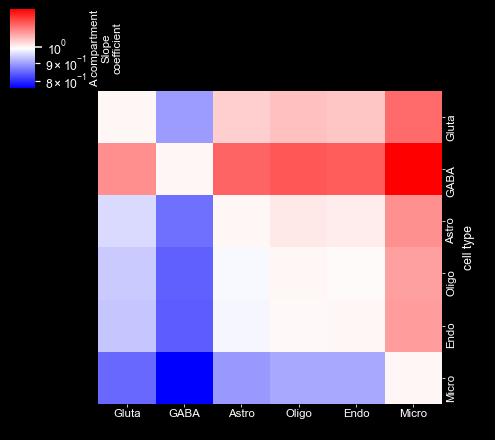

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/785549018.py:19: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)


In [610]:
from scipy.cluster.hierarchy import linkage,dendrogram
from matplotlib.colors import LogNorm

_corr_lkg = linkage(A_slope_df.values, method='weighted')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.8, 1.25
ax = sns.clustermap(A_slope_df, 
                    row_cluster=False, col_cluster=False,
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='bwr', vmin=vmin, vmax=vmax, norm=LogNorm())
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('A compartment\nSlope\ncoefficient', labelpad=2, fontsize=_font_size)
#plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.pdf"),
#            transparent=True, bbox_inches='tight', dpi=300)
#plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.png"),
#            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [611]:
A_slope_df.values / B_slope_df.values

array([[1.        , 1.01315256, 1.02017371, 1.02377331, 1.02891807,
        1.07739209],
       [0.98700478, 1.        , 1.00873331, 1.01158477, 1.01829273,
        1.06655398],
       [0.97887068, 0.99353493, 1.        , 1.00448619, 1.01178919,
        1.0590963 ],
       [0.97440542, 0.98831129, 0.9963884 , 1.        , 1.00756604,
        1.05474114],
       [0.96293768, 0.97824046, 0.98686156, 0.99072934, 1.        ,
        1.04659789],
       [0.9201486 , 0.9350237 , 0.94268901, 0.9464424 , 0.95509518,
        1.        ]])

<IPython.core.display.Javascript object>


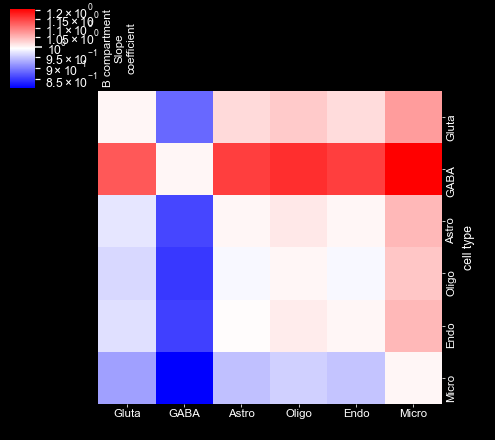

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3799590837.py:21: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)


In [612]:
%matplotlib notebook
from scipy.cluster.hierarchy import linkage,dendrogram
from matplotlib.colors import LogNorm

_corr_lkg = linkage(B_slope_df.values, method='weighted')
#_corr_lkg = False
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.8, 1.25
ax = sns.clustermap(B_slope_df, 
                    row_cluster=False, col_cluster=False,
                    col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='bwr', vmin=vmin, vmax=vmax, norm=LogNorm())
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('B compartment\nSlope\ncoefficient', labelpad=2, fontsize=_font_size)
#plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.pdf"),
#            transparent=True, bbox_inches='tight', dpi=300)
#plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.png"),
#            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


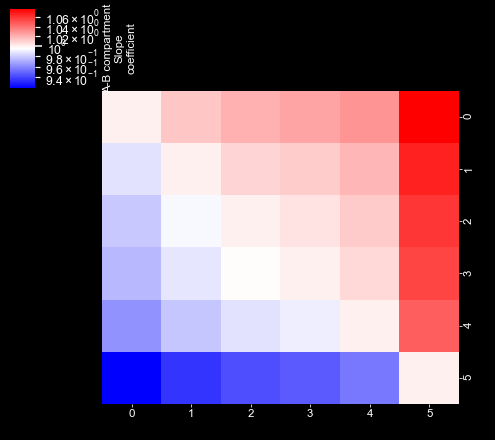

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3903435359.py:19: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)


In [613]:
from scipy.cluster.hierarchy import linkage,dendrogram
from matplotlib.colors import LogNorm

#_corr_lkg = linkage(AB_slope_df.values, method='mean')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.8, 1.25
ax = sns.clustermap(A_slope_df.values / B_slope_df.values, #AB_slope_df, 
                    row_cluster=False, col_cluster=False,
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='bwr', vmin=vmin, vmax=vmax, norm=LogNorm())
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('A-B compartment\nSlope\ncoefficient', labelpad=2, fontsize=_font_size)
#plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.pdf"),
#            transparent=True, bbox_inches='tight', dpi=300)
#plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.png"),
#            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


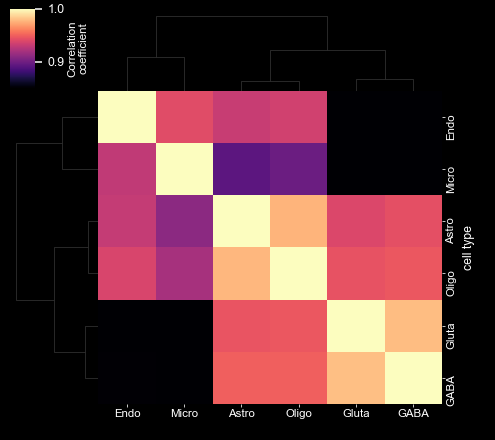

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3454408935.py:16: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax])


In [614]:
from scipy.cluster.hierarchy import linkage,dendrogram
_corr_lkg = linkage(A_correlation_df.values, method='median')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.85,1
ax = sns.clustermap(A_correlation_df, 
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='magma', vmin=vmin, vmax=vmax)
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('Correlation\ncoefficient', labelpad=2, fontsize=_font_size)
#plt.savefig(os.path.join(variation_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.pdf"),
#            transparent=True, bbox_inches='tight', dpi=300)
#plt.savefig(os.path.join(variation_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.png"),
#            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


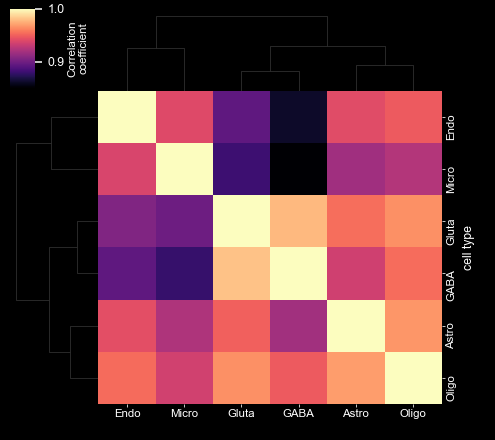

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2215966799.py:16: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax])


In [615]:
from scipy.cluster.hierarchy import linkage,dendrogram
_corr_lkg = linkage(B_correlation_df.values, method='median')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.85,1
ax = sns.clustermap(B_correlation_df, 
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='magma', vmin=vmin, vmax=vmax)
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('Correlation\ncoefficient', labelpad=2, fontsize=_font_size)
#plt.savefig(os.path.join(variation_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.pdf"),
#            transparent=True, bbox_inches='tight', dpi=300)
#plt.savefig(os.path.join(variation_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.png"),
#            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [678]:
gluta_based_slopes = [
    chr_2_slopeDf[sel_chr]['Gluta'],
    A_slope_df['Gluta'],
    #AB_slope_df['Gluta'],
    B_slope_df['Gluta'],
]
gluta_slope_df = pd.DataFrame(gluta_based_slopes)

gluta_slope_df['Compartments'] = ['total', 'A-A', #'A-B', 
                                  'B-B']
gluta_slope_df = gluta_slope_df.set_index('Compartments')


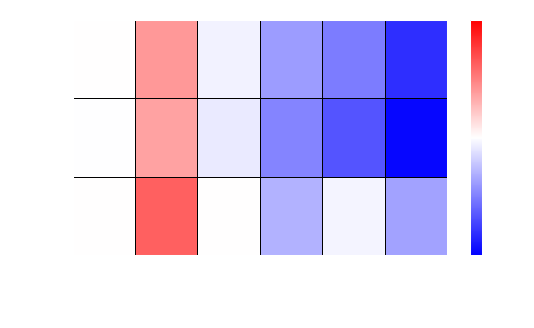

In [683]:
import matplotlib.ticker as tkr
formatter = tkr.StrMethodFormatter('{x:.2f}')

vmin,vmax = 1/1.2, 1.2
fig, ax = plt.subplots(figsize=(4,2), dpi=150)

hmp = sns.heatmap(gluta_slope_df, ax=ax,cmap='bwr', linewidth=_ticklabel_width/2, linecolor='black',
                  vmin=vmin, vmax=vmax, norm=LogNorm(vmin=vmin, vmax=vmax), 
                  cbar_kws={'ticks':[vmin,1,vmax], "format": formatter})
hmp.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)
hmp.collections[0].colorbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False) # remove bottom ticklabels for cbar
[i[1].set_linewidth(_ticklabel_width) for i in hmp.collections[0].colorbar.ax.spines.items()]

# Drawing the frame
for _, spine in hmp.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(_ticklabel_width)
    
plt.savefig(os.path.join(scale_figure_folder, f"Slopes_Gluta_heatmap_Chr{sel_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(scale_figure_folder, f"Slopes_Gluta_heatmap_Chr{sel_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [618]:
figure_folder

'\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MouseBrain_PostAnalysis_0920\\Figures_0920_dark'

In [680]:
normed_gluta_based_slopes = [
    chr_2_slopeDf[sel_chr]['Gluta'] / chr_2_slopeDf[sel_chr]['Gluta'],
    A_slope_df['Gluta'] / chr_2_slopeDf[sel_chr]['Gluta'],
    #AB_slope_df['Gluta'] / chr_2_slopeDf[sel_chr]['Gluta'],
    B_slope_df['Gluta'] / chr_2_slopeDf[sel_chr]['Gluta'],
]
normed_gluta_slope_df = pd.DataFrame(normed_gluta_based_slopes)

normed_gluta_slope_df['source'] = ['total', 'A-A', #'A-B', 
                                   'B-B']
normed_gluta_slope_df = normed_gluta_slope_df.set_index('source')


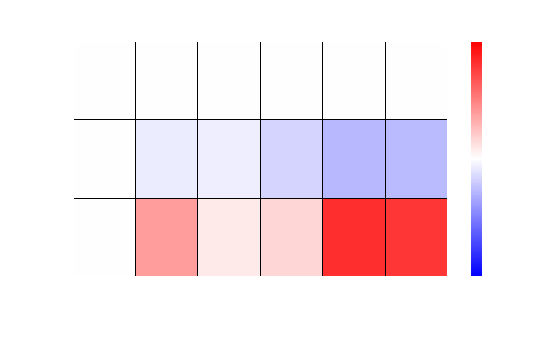

In [684]:
import matplotlib.ticker as tkr
formatter = tkr.StrMethodFormatter('{x:.2f}')

vmin,vmax = 0.9, 1/0.9
fig, ax = plt.subplots(figsize=(4,2), dpi=150)

hmp = sns.heatmap(normed_gluta_slope_df, ax=ax,cmap='bwr', linewidth=_ticklabel_width/2, linecolor='black',
                  vmin=vmin, vmax=vmax, norm=LogNorm(vmin=vmin, vmax=vmax), 
                  cbar_kws={'ticks':[vmin,1,vmax], "format": formatter})
hmp.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)
hmp.collections[0].colorbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False) # remove bottom ticklabels for cbar
[i[1].set_linewidth(_ticklabel_width) for i in hmp.collections[0].colorbar.ax.spines.items()]

# Drawing the frame
for _, spine in hmp.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(_ticklabel_width)
ax.set_title("Normalized Slope to Gluta")
    
plt.savefig(os.path.join(scale_figure_folder, f"Normalized_Slopes_Gluta_heatmap_Chr{sel_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(scale_figure_folder, f"Normalized_Slopes_Gluta_heatmap_Chr{sel_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

NameError: name 'sel_classes' is not defined

In [628]:
class_2_transMedianMat = {}
for _cls in _celltype_order:
    _median_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
        class_2_medianDict[_cls], codebook, use_cis=False, use_trans=False, sort_by_region=False)
    class_2_transMedianMat[_cls] = _median_mat

In [646]:
trans_correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
trans_slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
for _cls_1 in _celltype_order:
    
    if len(class_2_chr2ZxysList[_cls_1]) < num_th:
        continue
    _mat_1 = class_2_transMedianMat[_cls_1]
    _reg_rs = []
    _reg_ks = []
    for _cls_2 in _celltype_order:
        _mat_2 = class_2_transMedianMat[_cls_2]
        if len(class_2_chr2ZxysList[_cls_2]) < num_th:
            continue
        #run regression
        X = _mat_1[np.triu_indices_from(_mat_1,1)]
        y = _mat_2[np.triu_indices_from(_mat_2,1)]
        valid_inds = (np.isfinite(X) & np.isfinite(y))
        #print(np.sum(valid_inds), _cls_1)
        X = X[valid_inds,np.newaxis]
        y = y[valid_inds]
        #sel_inds = np.where()
        reg = LinearRegression(fit_intercept=False).fit(X, y)
        #Returns the coefficient of determination R^2 of the prediction.
        _r = np.sqrt(reg.score(X, y))
        _reg_rs.append(_r)
        _reg_ks.append(reg.coef_[0])
        trans_correlation_dicts[_cls_1] = _reg_rs
        trans_slope_dicts[_cls_1] = _reg_ks
# append as DF
trans_correlation_df = pd.DataFrame(trans_correlation_dicts).set_index('cell type')  
trans_slope_df = pd.DataFrame(trans_slope_dicts).set_index('cell type')  

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2359568602.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2359568602.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))


In [632]:
A_trans_correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
A_trans_slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
for _cls_1 in _celltype_order:
    
    if len(class_2_chr2ZxysList[_cls_1]) < num_th:
        continue
    _mat_1 = class_2_transMedianMat[_cls_1][ensemble_AB_dict['A'][:,np.newaxis], ensemble_AB_dict['A']]
    _reg_rs = []
    _reg_ks = []
    for _cls_2 in _celltype_order:
        _mat_2 = class_2_transMedianMat[_cls_2][ensemble_AB_dict['A'][:,np.newaxis], ensemble_AB_dict['A']]
        if len(class_2_chr2ZxysList[_cls_2]) < num_th:
            continue
        #run regression
        X = _mat_1[np.triu_indices_from(_mat_1,1)]
        y = _mat_2[np.triu_indices_from(_mat_2,1)]
        valid_inds = (np.isfinite(X) & np.isfinite(y))
        #print(np.sum(valid_inds), _cls_1)
        X = X[valid_inds,np.newaxis]
        y = y[valid_inds]
        #sel_inds = np.where()
        reg = LinearRegression(fit_intercept=False).fit(X, y)
        #Returns the coefficient of determination R^2 of the prediction.
        _r = np.sqrt(reg.score(X, y))
        _reg_rs.append(_r)
        _reg_ks.append(reg.coef_[0])
        A_trans_correlation_dicts[_cls_1] = _reg_rs
        A_trans_slope_dicts[_cls_1] = _reg_ks
# append as DF
A_trans_correlation_df = pd.DataFrame(A_trans_correlation_dicts).set_index('cell type')  
A_trans_slope_df = pd.DataFrame(A_trans_slope_dicts).set_index('cell type')  

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2934670120.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2934670120.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2934670120.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))


In [644]:
B_trans_correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
B_trans_slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
for _cls_1 in _celltype_order:
    
    if len(class_2_chr2ZxysList[_cls_1]) < num_th:
        continue
    _mat_1 = class_2_transMedianMat[_cls_1][ensemble_AB_dict['B'][:,np.newaxis], ensemble_AB_dict['B']]
    _reg_rs = []
    _reg_ks = []
    for _cls_2 in _celltype_order:
        _mat_2 = class_2_transMedianMat[_cls_2][ensemble_AB_dict['B'][:,np.newaxis], ensemble_AB_dict['B']]
        if len(class_2_chr2ZxysList[_cls_2]) < num_th:
            continue
        #run regression
        X = _mat_1[np.triu_indices_from(_mat_1,1)]
        y = _mat_2[np.triu_indices_from(_mat_2,1)]
        valid_inds = (np.isfinite(X) & np.isfinite(y))
        #print(np.sum(valid_inds), _cls_1)
        X = X[valid_inds,np.newaxis]
        y = y[valid_inds]
        #sel_inds = np.where()
        reg = LinearRegression(fit_intercept=False).fit(X, y)
        #Returns the coefficient of determination R^2 of the prediction.
        _r = np.sqrt(reg.score(X, y))
        print(reg.score(X, y))
        _reg_rs.append(_r)
        _reg_ks.append(reg.coef_[0])
        B_trans_correlation_dicts[_cls_1] = _reg_rs
        B_trans_slope_dicts[_cls_1] = _reg_ks
# append as DF
B_trans_correlation_df = pd.DataFrame(B_trans_correlation_dicts).set_index('cell type')  
B_trans_slope_df = pd.DataFrame(B_trans_slope_dicts).set_index('cell type')  

1.0
0.5076888471061263
-0.22095202263156333
0.04032827366131131
-0.38864789158411917


C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))


-0.09341843143709139
0.4216197337751151
1.0
-0.7797432472593422
-0.5872603581689055


C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))


-0.7789230530457267
-0.5006197298988102
0.22730534705614514
0.04127761065515334
1.0
0.3644001927493168
0.1541049134157898
0.2694350134318425
0.45036535540146505
0.2262052532353498
0.424790767634904
1.0
0.2719696461238157
0.4277890967616653
-0.2129696100201015


C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))


-0.3226384744241724
-0.1675217371239648
-0.11033970024297668
1.0
0.147241068834975


C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/2757722735.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))


-0.17950046150492605
-0.3781222072881125
-0.24535614661926308
-0.07774725314899444
-0.053159628835046435
1.0


In [648]:
AB_trans_correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
AB_trans_slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
for _cls_1 in _celltype_order:
    
    if len(class_2_chr2ZxysList[_cls_1]) < num_th:
        continue
    _mat_1 = class_2_transMedianMat[_cls_1][ensemble_AB_dict['A'][:,np.newaxis], ensemble_AB_dict['B']]
    _reg_rs = []
    _reg_ks = []
    for _cls_2 in _celltype_order:
        _mat_2 = class_2_transMedianMat[_cls_2][ensemble_AB_dict['A'][:,np.newaxis], ensemble_AB_dict['B']]
        if len(class_2_chr2ZxysList[_cls_2]) < num_th:
            continue
        #run regression
        X = _mat_1[np.triu_indices_from(_mat_1,1)]
        y = _mat_2[np.triu_indices_from(_mat_2,1)]
        valid_inds = (np.isfinite(X) & np.isfinite(y))
        #print(np.sum(valid_inds), _cls_1)
        X = X[valid_inds,np.newaxis]
        y = y[valid_inds]
        #sel_inds = np.where()
        reg = LinearRegression(fit_intercept=False).fit(X, y)
        #Returns the coefficient of determination R^2 of the prediction.
        _r = np.sqrt(reg.score(X, y))
        _reg_rs.append(_r)
        _reg_ks.append(reg.coef_[0])
        AB_trans_correlation_dicts[_cls_1] = _reg_rs
        AB_trans_slope_dicts[_cls_1] = _reg_ks
# append as DF
AB_trans_correlation_df = pd.DataFrame(AB_trans_correlation_dicts).set_index('cell type')  
AB_trans_slope_df = pd.DataFrame(AB_trans_slope_dicts).set_index('cell type')  

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3292406356.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3292406356.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3292406356.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3292406356.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3292406356.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3292406356.py:24: RuntimeWarning: invalid value encountered in sqrt
  _r = np.sqrt(reg.score(X, y))
C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/3292406356.py:24: RuntimeWarning: invalid v

<IPython.core.display.Javascript object>


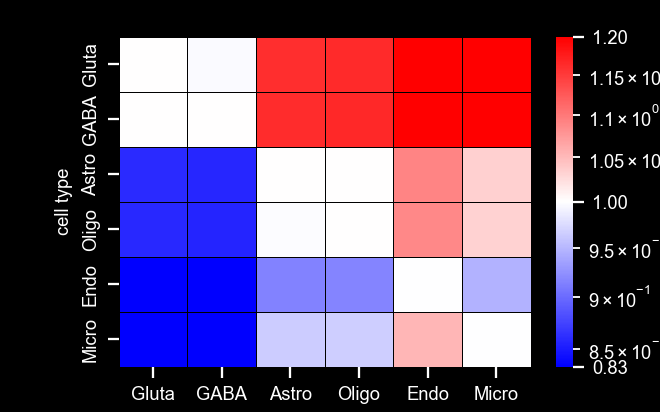

In [647]:
fig, ax = plt.subplots(figsize=(4,2.5), dpi=150)

hmp = sns.heatmap(trans_slope_df, ax=ax,cmap='bwr', linewidth=_ticklabel_width/2, linecolor='black',
                  vmin=vmin, vmax=vmax, norm=LogNorm(vmin=vmin, vmax=vmax), 
                  cbar_kws={'ticks':[vmin,1,vmax], "format": formatter})

<IPython.core.display.Javascript object>


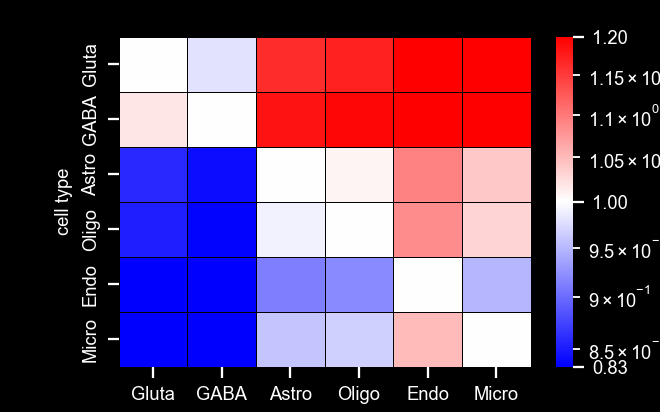

In [634]:
fig, ax = plt.subplots(figsize=(4,2.5), dpi=150)

hmp = sns.heatmap(A_trans_slope_df, ax=ax,cmap='bwr', linewidth=_ticklabel_width/2, linecolor='black',
                  vmin=vmin, vmax=vmax, norm=LogNorm(vmin=vmin, vmax=vmax), 
                  cbar_kws={'ticks':[vmin,1,vmax], "format": formatter})

<IPython.core.display.Javascript object>


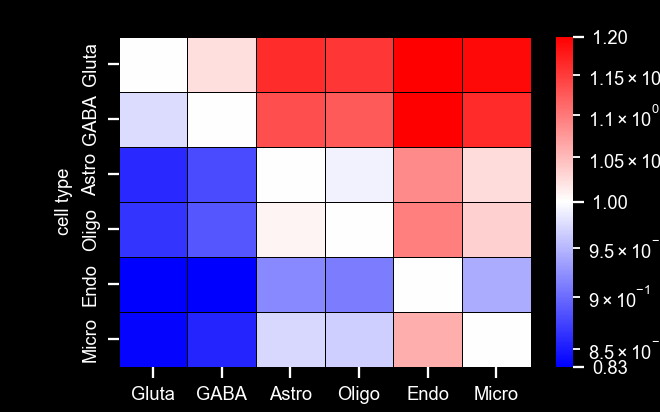

In [636]:
fig, ax = plt.subplots(figsize=(4,2.5), dpi=150)

hmp = sns.heatmap(B_trans_slope_df, ax=ax,cmap='bwr', linewidth=_ticklabel_width/2, linecolor='black',
                  vmin=vmin, vmax=vmax, norm=LogNorm(vmin=vmin, vmax=vmax), 
                  cbar_kws={'ticks':[vmin,1,vmax], "format": formatter})

In [654]:
gluta_based_trans_slopes = [
    trans_slope_df['Gluta'],
    A_trans_slope_df['Gluta'],
    AB_trans_slope_df['Gluta'],
    B_trans_slope_df['Gluta'],
]
gluta_trans_slope_df = pd.DataFrame(gluta_based_trans_slopes)

gluta_trans_slope_df['Compartments'] = ['total', 'A-A', 'A-B', 'B-B']
gluta_trans_slope_df = gluta_trans_slope_df.set_index('Compartments')


<IPython.core.display.Javascript object>


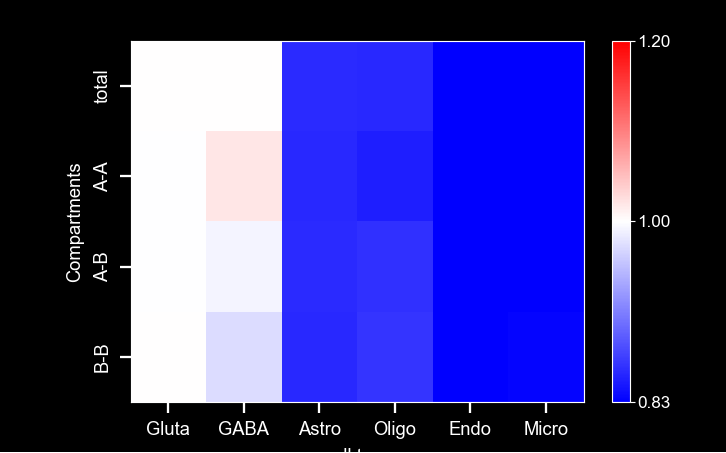

In [655]:
import matplotlib.ticker as tkr
formatter = tkr.StrMethodFormatter('{x:.2f}')

vmin,vmax = 1/1.2, 1.2
fig, ax = plt.subplots(figsize=(4,2.5), dpi=150)

hmp = sns.heatmap(gluta_trans_slope_df, ax=ax,cmap='bwr', 
                  vmin=vmin, vmax=vmax, norm=LogNorm(vmin=vmin, vmax=vmax), 
                  cbar_kws={'ticks':[vmin,1,vmax], "format": formatter})
hmp.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)
hmp.collections[0].colorbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False) # remove bottom ticklabels for cbar
[i[1].set_linewidth(_ticklabel_width) for i in hmp.collections[0].colorbar.ax.spines.items()]

# Drawing the frame
for _, spine in hmp.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(_ticklabel_width)
    
plt.savefig(os.path.join(scale_figure_folder, f"TransSlopes_Gluta_heatmap.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(scale_figure_folder, f"TransSlopes_Gluta_heatmap.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [656]:
normed_gluta_based_trans_slopes = [
    trans_slope_df['Gluta'] / trans_slope_df['Gluta'],
    A_trans_slope_df['Gluta'] / trans_slope_df['Gluta'],
    AB_trans_slope_df['Gluta'] / trans_slope_df['Gluta'],
    B_trans_slope_df['Gluta'] / trans_slope_df['Gluta'],
]
normed_gluta_trans_slope_df = pd.DataFrame(normed_gluta_based_trans_slopes)

normed_gluta_trans_slope_df['Compartments'] = ['total', 'A-A', 'A-B', 'B-B']
normed_gluta_trans_slope_df = normed_gluta_trans_slope_df.set_index('Compartments')


<IPython.core.display.Javascript object>


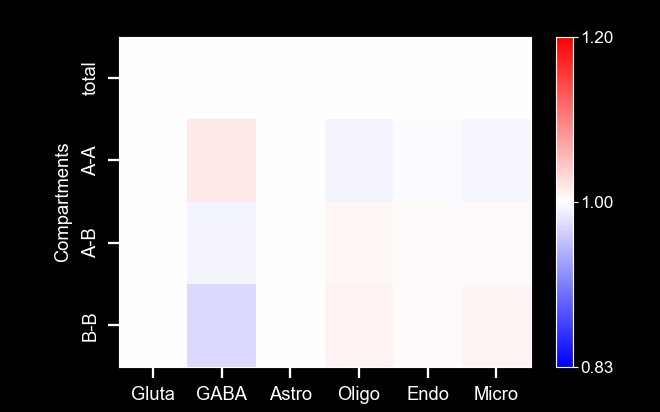

In [657]:
import matplotlib.ticker as tkr
formatter = tkr.StrMethodFormatter('{x:.2f}')

vmin,vmax = 1/1.2, 1.2
fig, ax = plt.subplots(figsize=(4,2.5), dpi=150)

hmp = sns.heatmap(normed_gluta_trans_slope_df, ax=ax,cmap='bwr', 
                  vmin=vmin, vmax=vmax, norm=LogNorm(vmin=vmin, vmax=vmax), 
                  cbar_kws={'ticks':[vmin,1,vmax], "format": formatter})
hmp.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)
hmp.collections[0].colorbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False) # remove bottom ticklabels for cbar
[i[1].set_linewidth(_ticklabel_width) for i in hmp.collections[0].colorbar.ax.spines.items()]

# Drawing the frame
for _, spine in hmp.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(_ticklabel_width)
    
plt.savefig(os.path.join(scale_figure_folder, f"NormedTransSlopes_Gluta_heatmap.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(scale_figure_folder, f"NormedTransSlopes_Gluta_heatmap.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()